In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns' ,None)
pd.pandas.set_option('display.max_rows' ,None)

#featureengineering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

#classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV


In [2]:
df=pd.read_csv("data.csv")

# Profile of the Data

In [3]:
df.shape

(569, 33)

In [4]:
df.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
418    906024         B        12.70         12.17           80.88      495.0   
423    906878         B        13.66         19.13           89.46      575.3   
547    922840         B        10.26         16.58           65.85      320.8   
413    905557         B        14.99         22.11           97.53      693.7   
15   84799002         M        14.54         27.54           96.73      658.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
418          0.08785           0.05794         0.02360              0.02402   
423          0.09057           0.11470         0.09657              0.04812   
547          0.08877           0.08066         0.04358              0.02438   
413          0.08515           0.10250         0.06859              0.03876   
15           0.11390           0.15950         0.16390              0.07364   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
418         0.1583                 0.06275     0.2253      0.6457   
423         0.1848                 0.06181     0.2244      0.8950   
547         0.1669                 0.06714     0.1144      1.0230   
413         0.1944                 0.05913     0.3186      1.3360   
15          0.2303                 0.07077     0.3700      1.0330   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
418        1.5270   17.370       0.006131         0.01263      0.009075   
423        1.8040   19.360       0.003980         0.02809      0.036690   
547        0.9887    7.326       0.010270         0.03084      0.026130   
413        2.3100   28.510       0.004449         0.02808      0.033120   
15         2.8790   32.550       0.005607         0.04240      0.047410   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
418           0.008231      0.01713              0.004414         13.65   
423           0.012740      0.01581              0.003956         15.14   
547           0.010970      0.02277              0.005890         10.83   
413           0.011960      0.01906              0.004015         16.76   
15            0.010900      0.01857              0.005466         17.46   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
418          16.92            88.12       566.9            0.1314   
423          25.50           101.40       708.8            0.1147   
547          22.04            71.08       357.4            0.1461   
413          31.55           110.20       867.1            0.1077   
15           37.13           124.10       943.2            0.1678   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
418             0.1607          0.09385               0.08224          0.2775   
423             0.3167          0.36600               0.14070          0.2744   
547             0.2246          0.17830               0.08333          0.2691   
413             0.3345          0.31140               0.13080          0.3163   
15              0.6577          0.70260               0.17120          0.4218   

     fractal_dimension_worst  Unnamed: 32  
418                  0.09464          NaN  
423                  0.08839          NaN  
547                  0.09479          NaN  
413                  0.09251          NaN  
15                   0.13410          NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [7]:
df.duplicated().sum()

0

In [8]:

df[df.duplicated()]

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Unnamed: 32]
Index: []

We dont have a duplicated values in our dataset

# Checking Null Values

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We dont any null values apart from Unnames column

In [10]:

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
df = df.dropna(axis=1)

# Column Separation

In [12]:
categorical_columns = df.columns[df.dtypes=='object']
numerical_columns = df.columns[df.dtypes !='object']

In [13]:
print(categorical_columns)
print("*"*75)
print(numerical_columns)

Index(['diagnosis'], dtype='object')
***************************************************************************
Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')



# 2. Statistics Based Analysis and Graph Based Analysis

In [14]:
df[numerical_columns].describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [15]:
df[categorical_columns].describe().T

count unique top freq
diagnosis   569      2   B  357

In [16]:
for i in categorical_columns:
    print(i)
    print(df[i].value_counts())
    print("-"*100)


diagnosis
B    357
M    212
Name: diagnosis, dtype: int64
----------------------------------------------------------------------------------------------------


Calculating the percentage of Dependant variable

In [17]:
Percenage_of_B=(df[df['diagnosis']=='B'].shape[0]/df.shape[0])*100
Percenage_of_M = (df[df['diagnosis']=='M'].shape[0]/df.shape[0])*100
print(f"Percentage of B is {Percenage_of_B}")
print(f"Percentage of M is {Percenage_of_M}")

Percentage of B is 62.741652021089635
Percentage of M is 37.258347978910365


In [18]:
corr = df.corr()
corr

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmetry_s

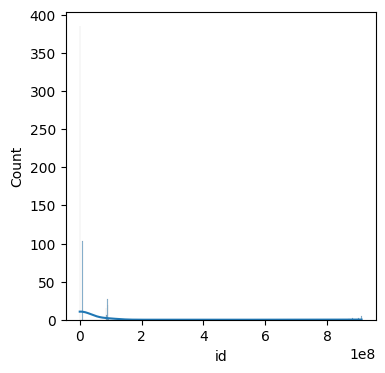

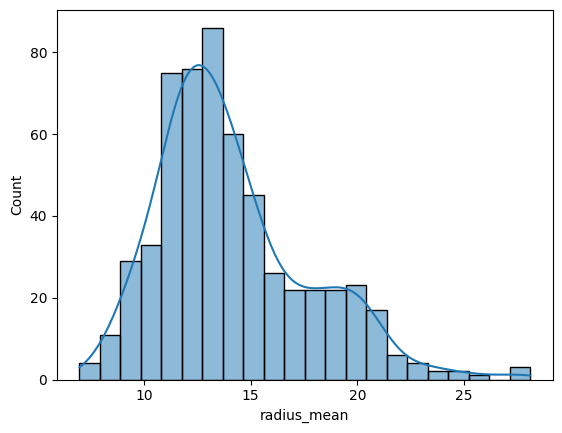

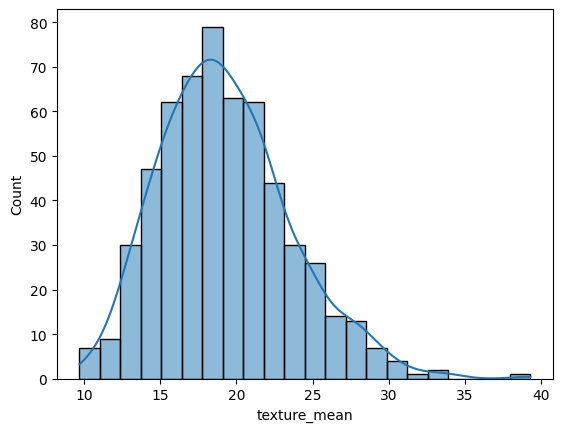

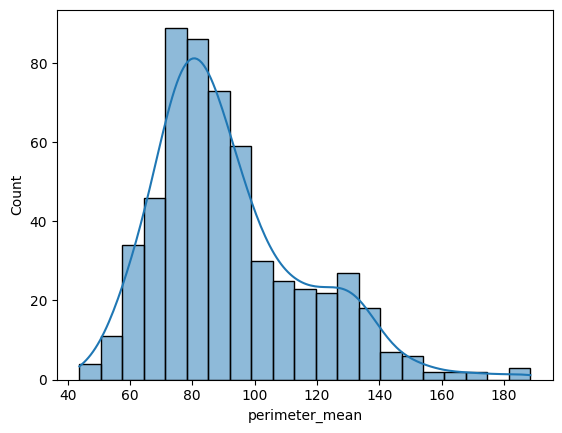

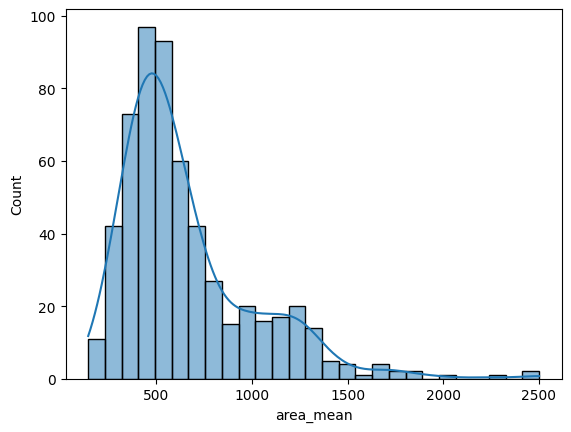

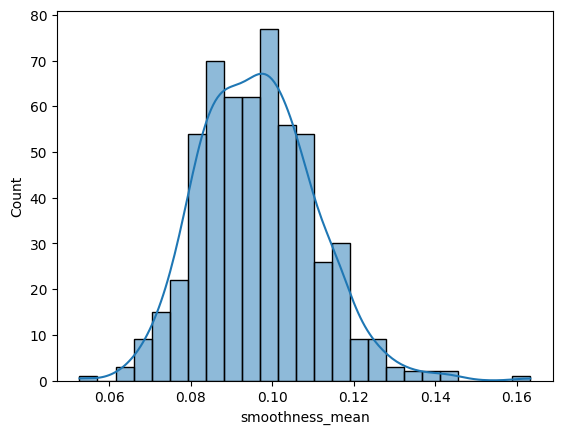

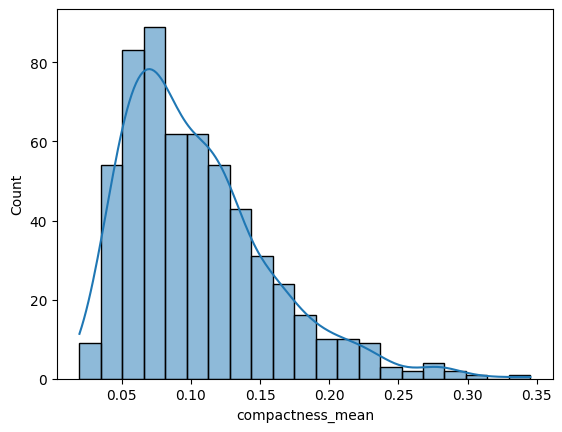

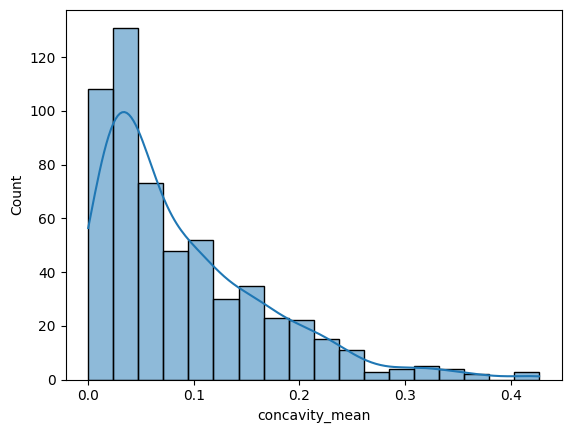

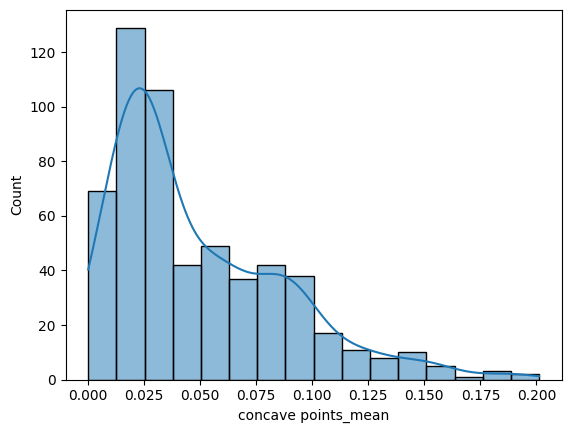

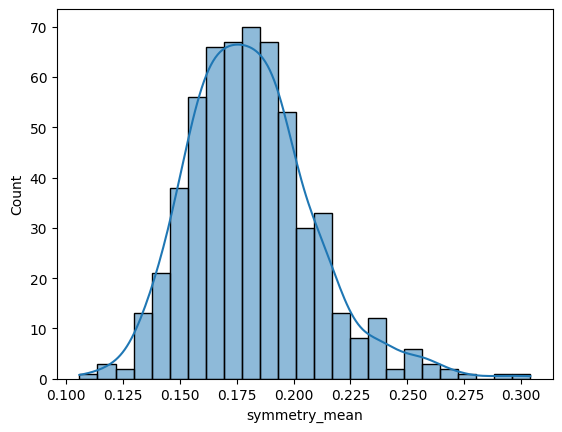

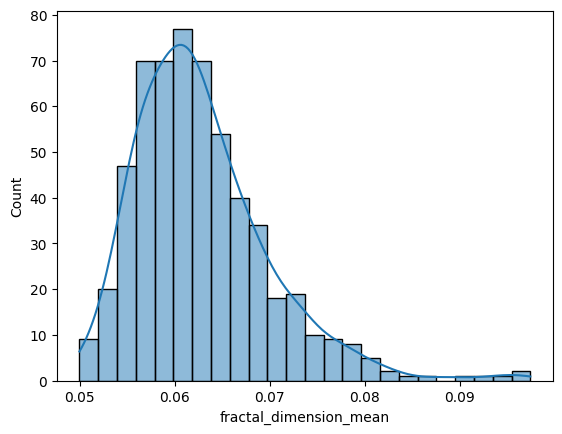

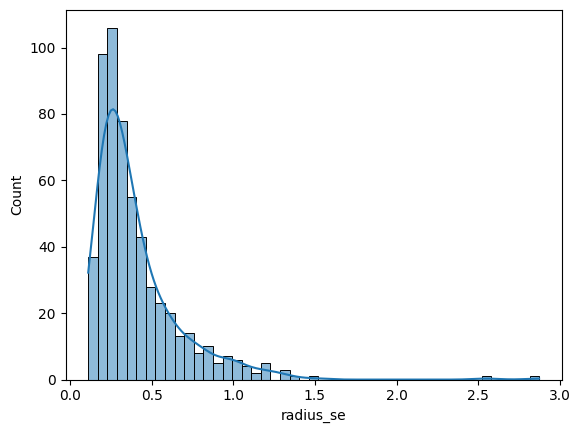

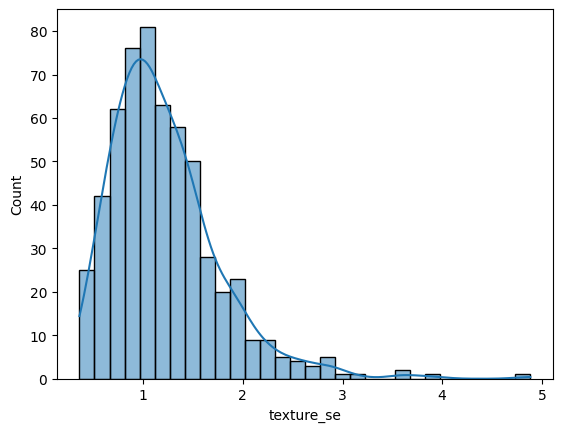

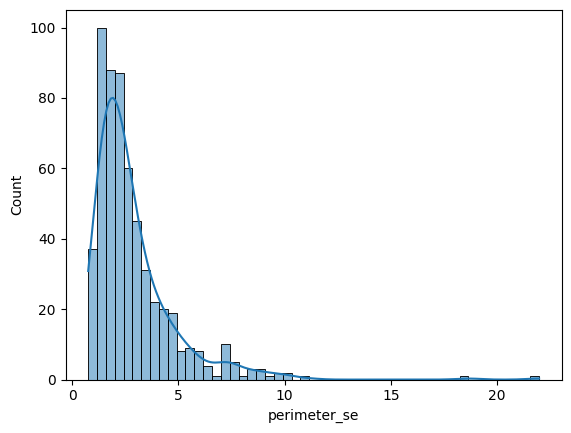

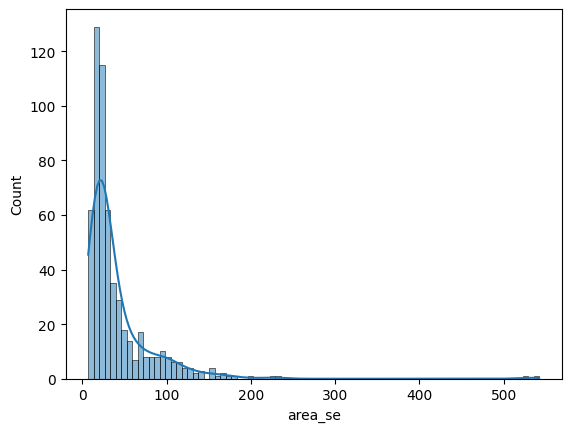

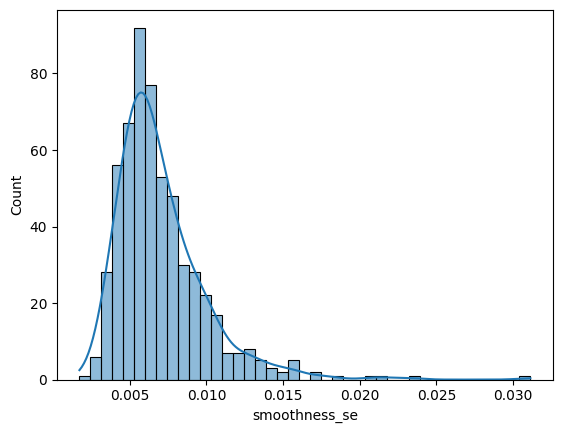

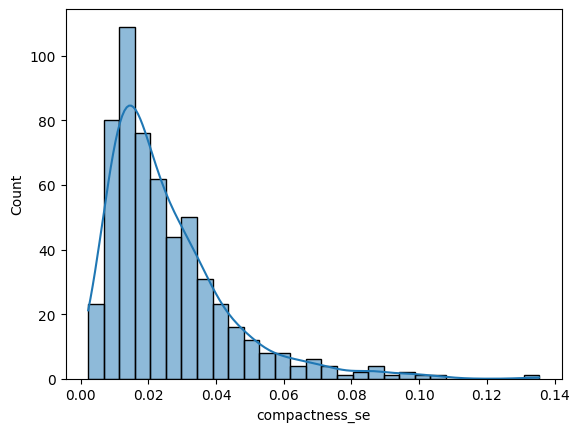

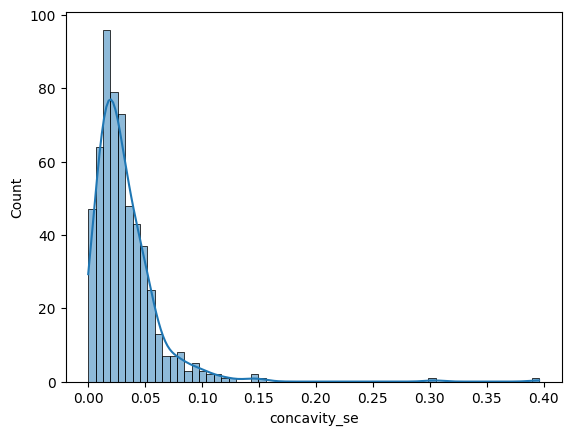

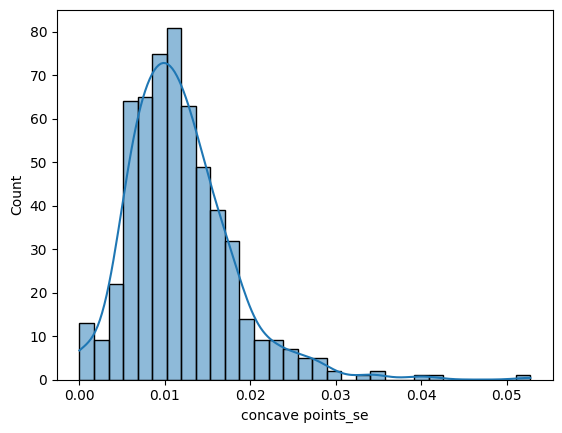

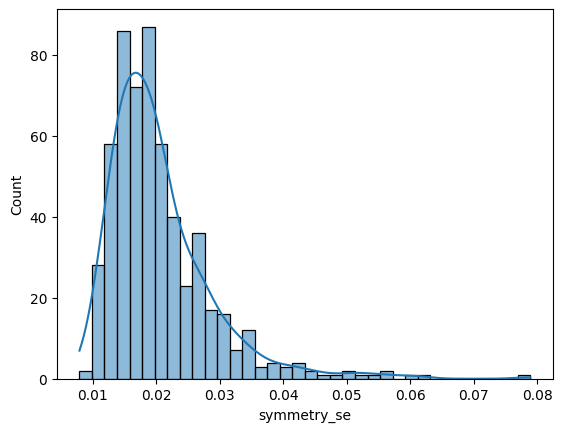

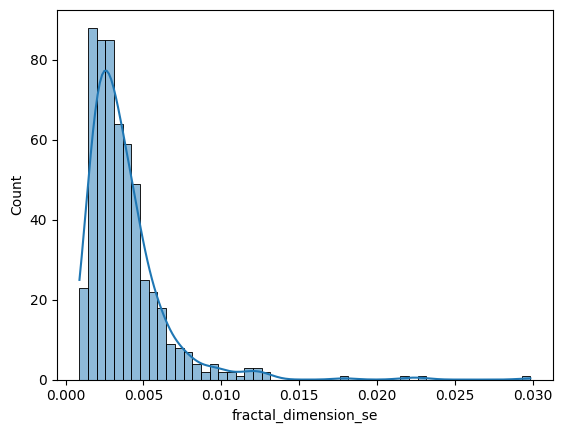

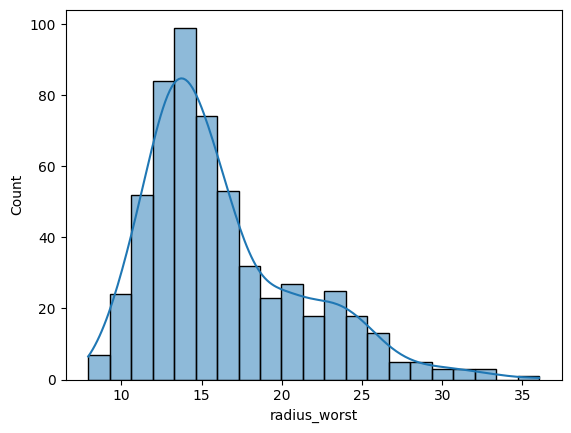

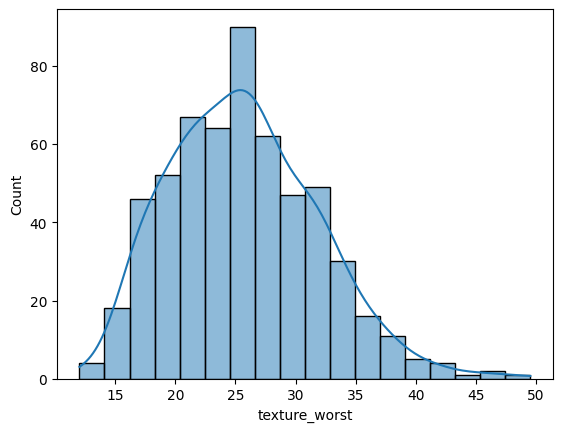

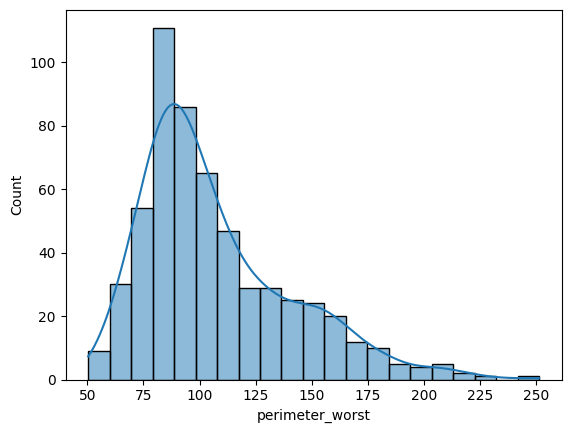

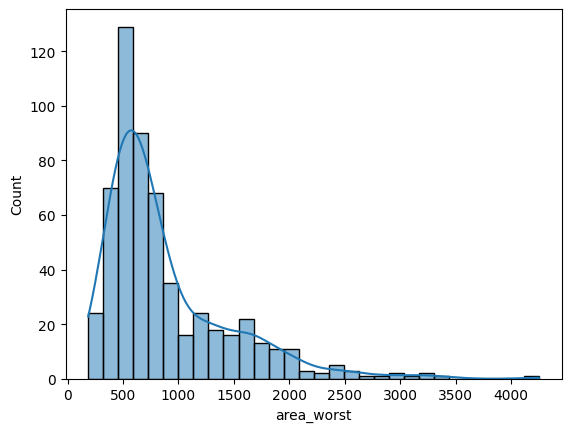

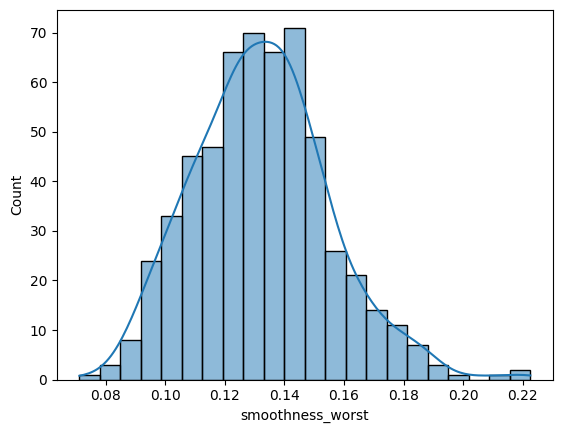

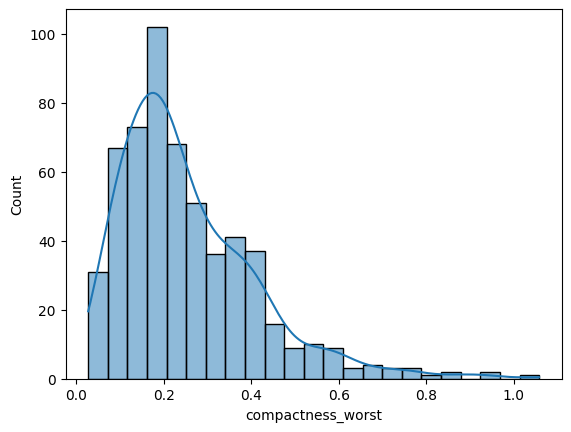

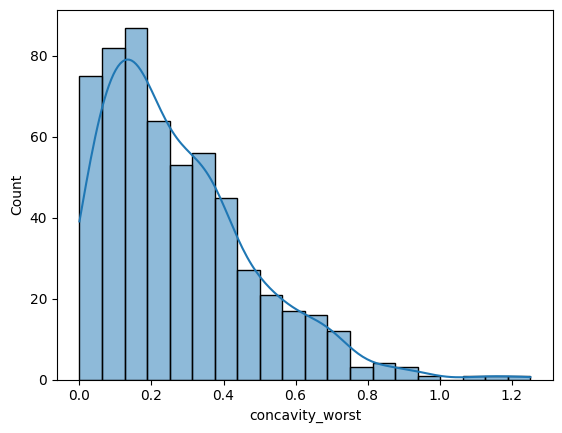

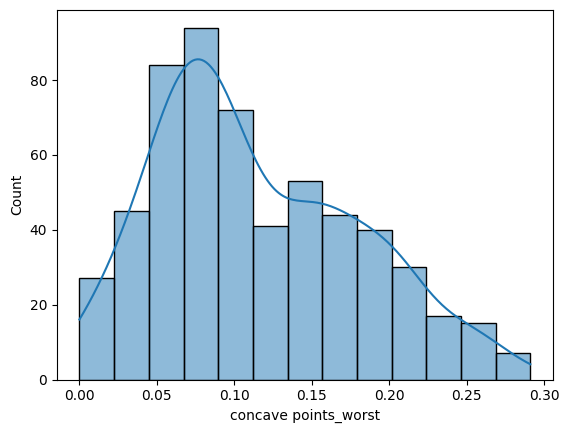

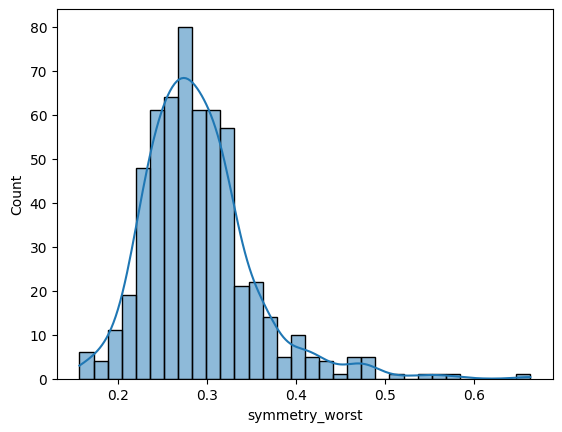

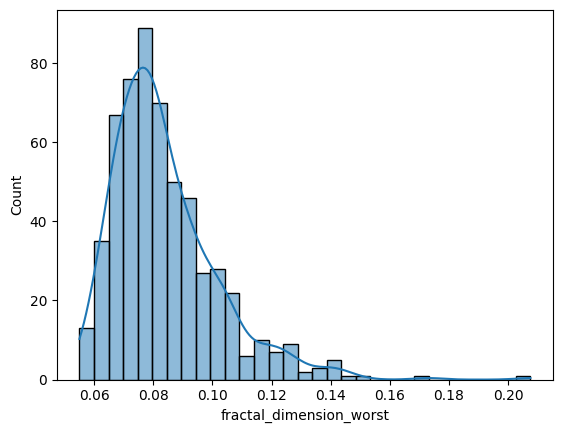

In [19]:
plt.figure(figsize=(4,4))
for i in numerical_columns:
    sns.histplot(data=df, x = i, kde=True)
    print("\n")
    plt.show()

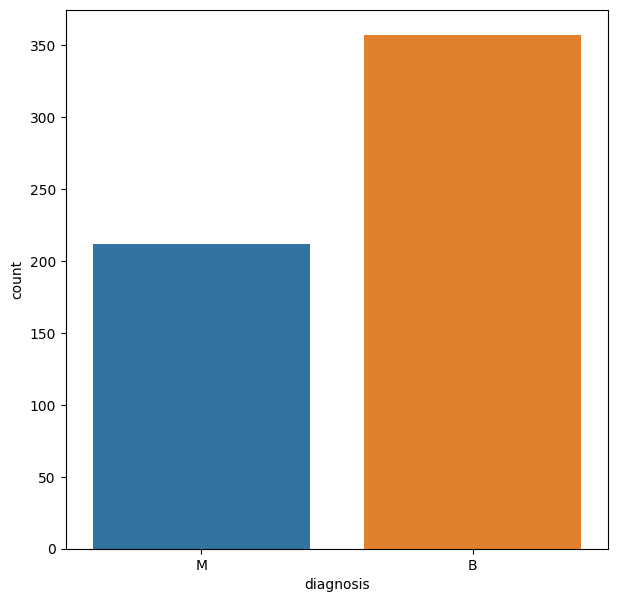

In [20]:
plt.figure(figsize=(7,7))
for i in categorical_columns:
    sns.countplot(data=df, x=i)
    print("\n")
    plt.show()

<Axes: >

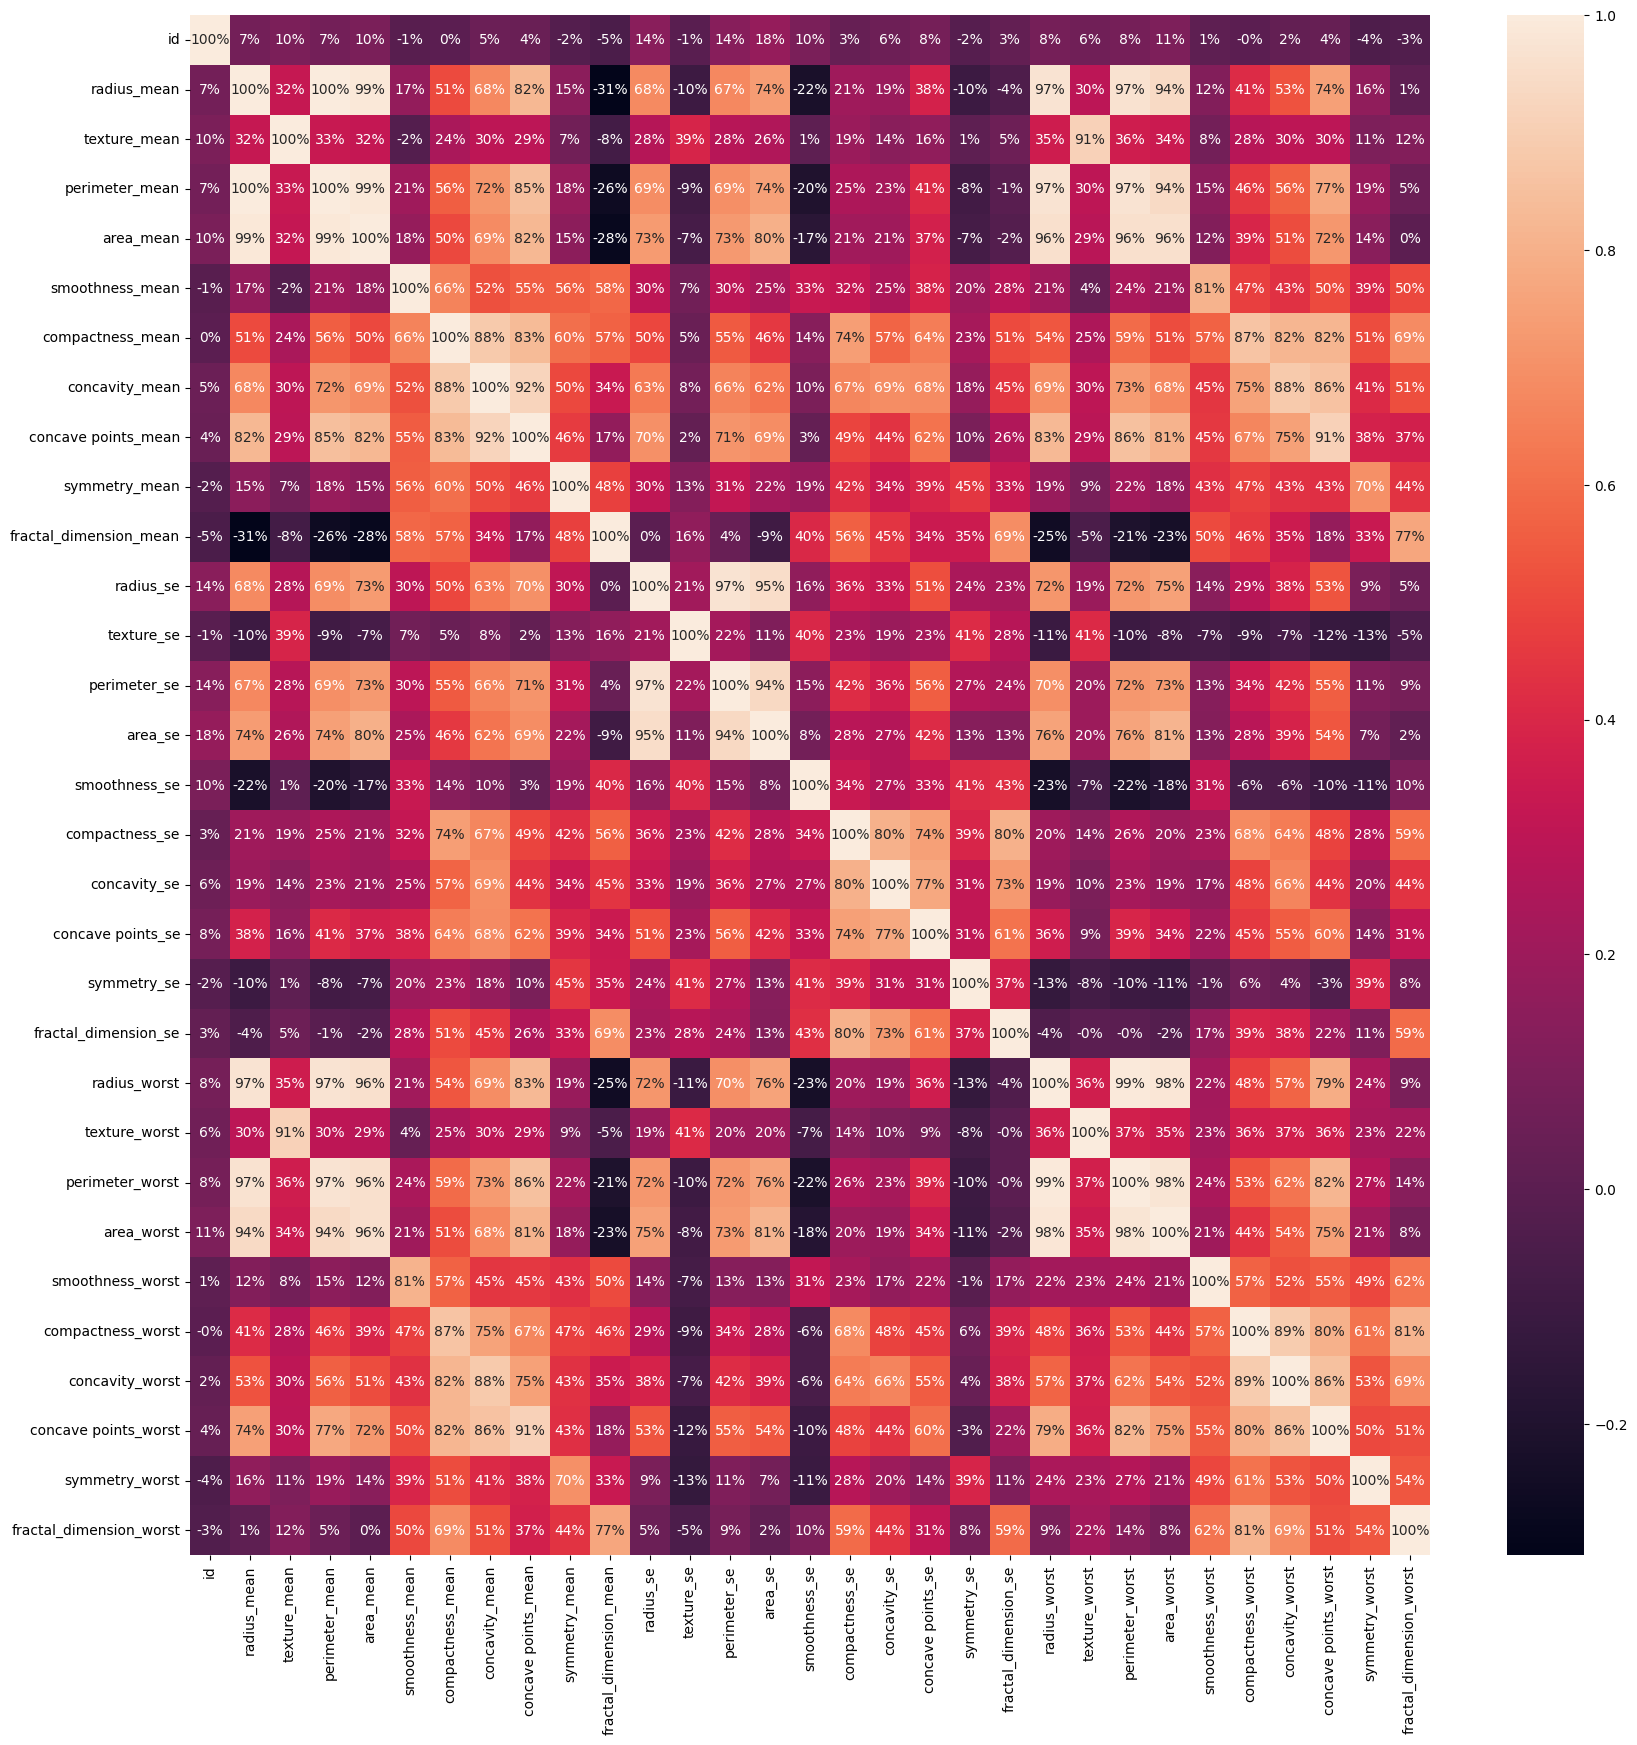

In [21]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt = '.0%')

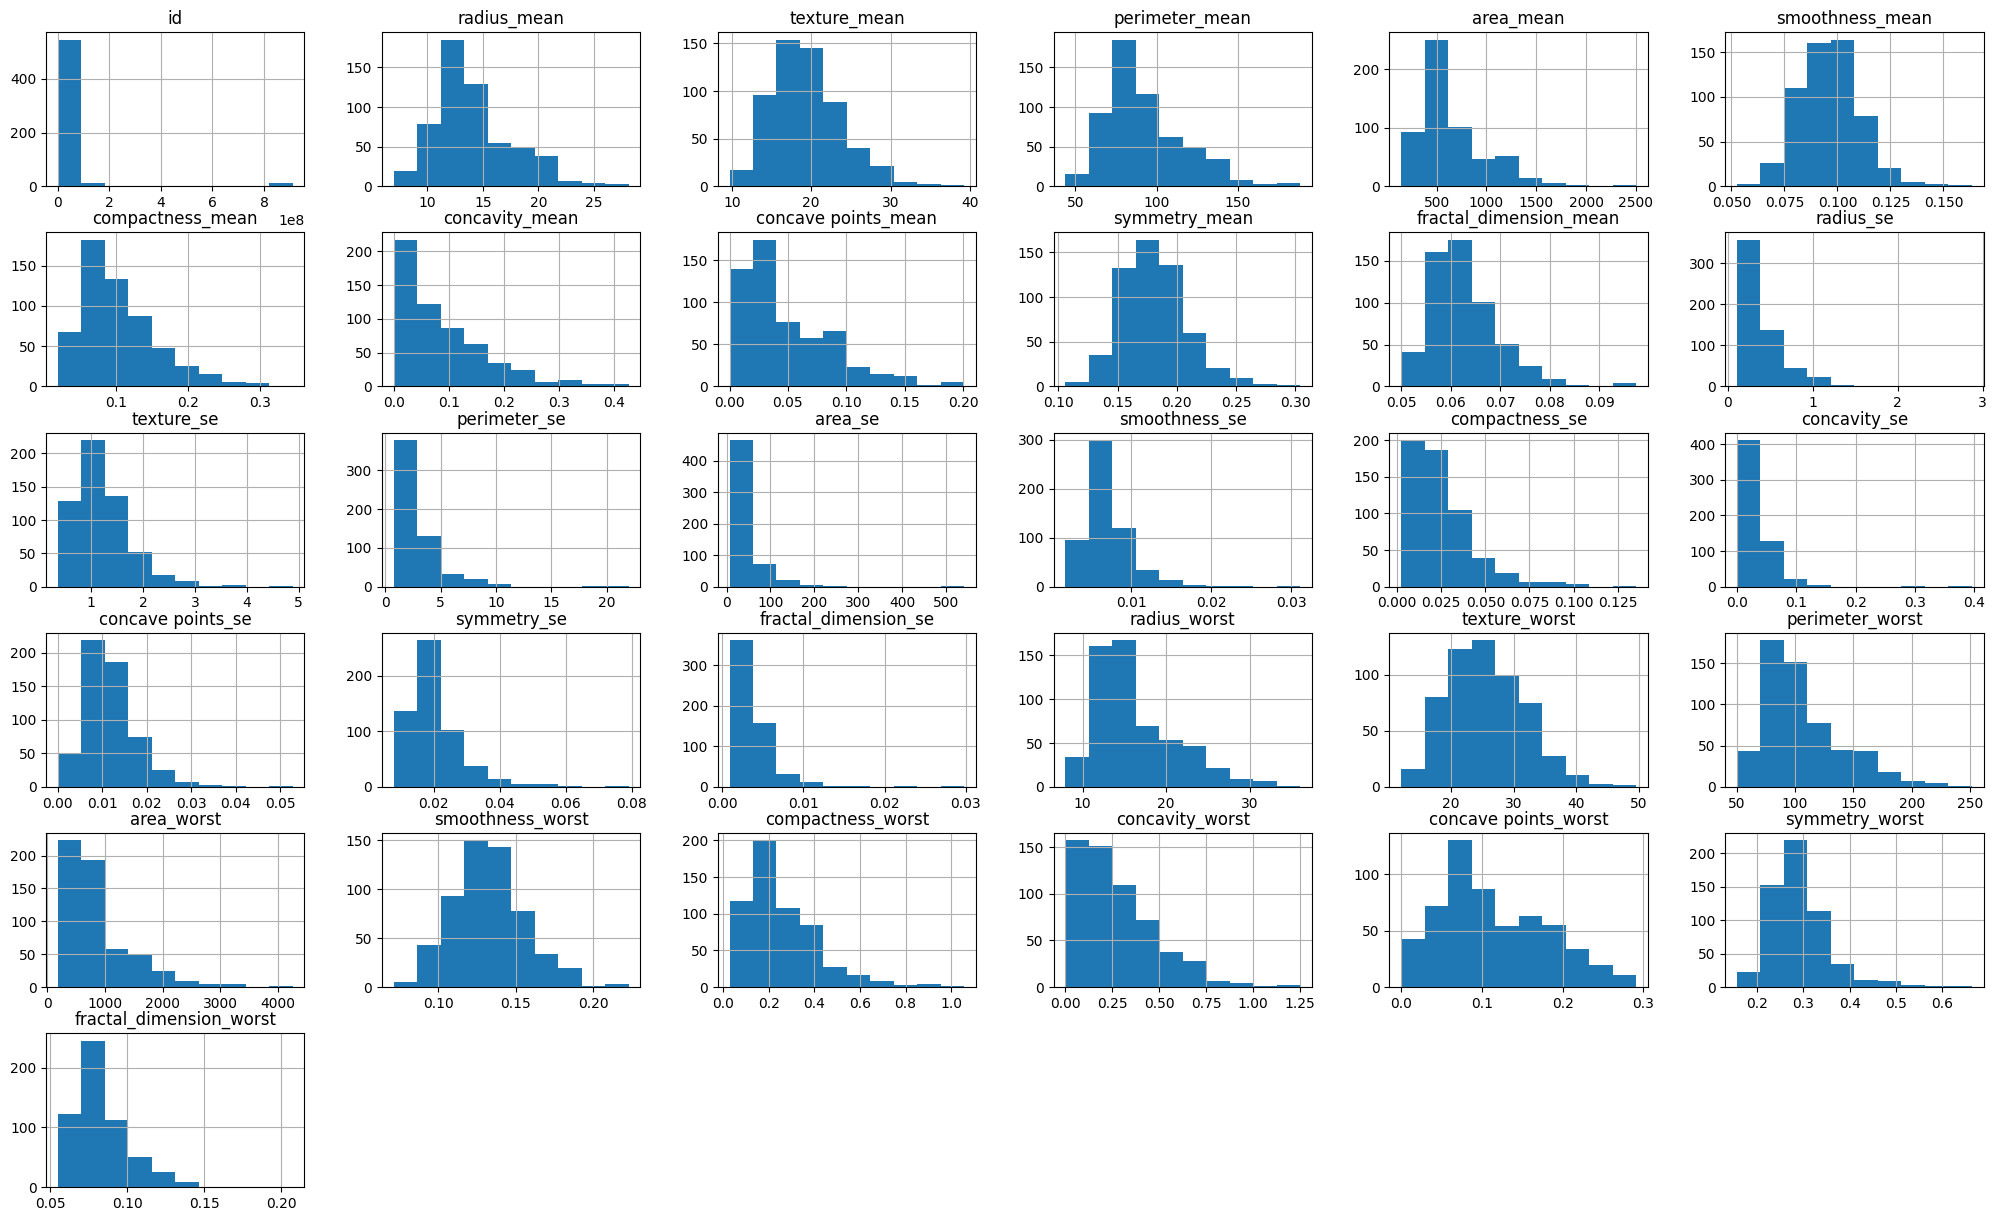

In [22]:
df.hist(figsize=(25,15))
plt.show()

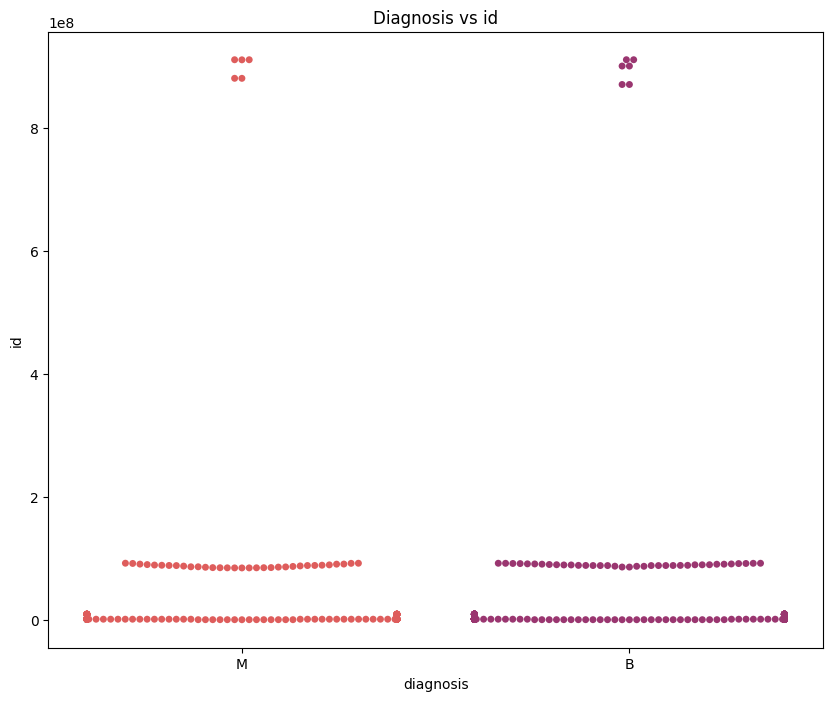

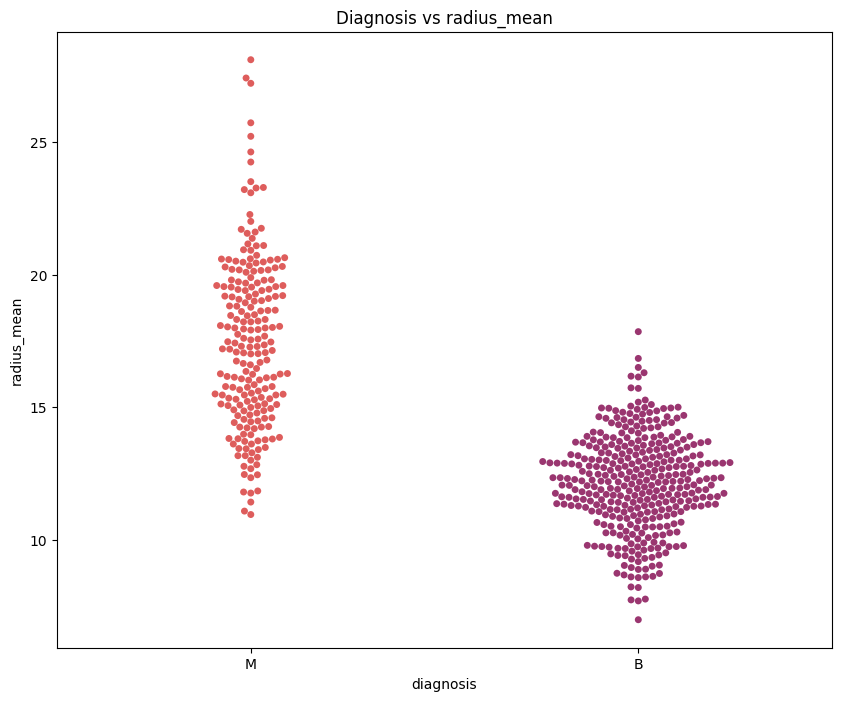

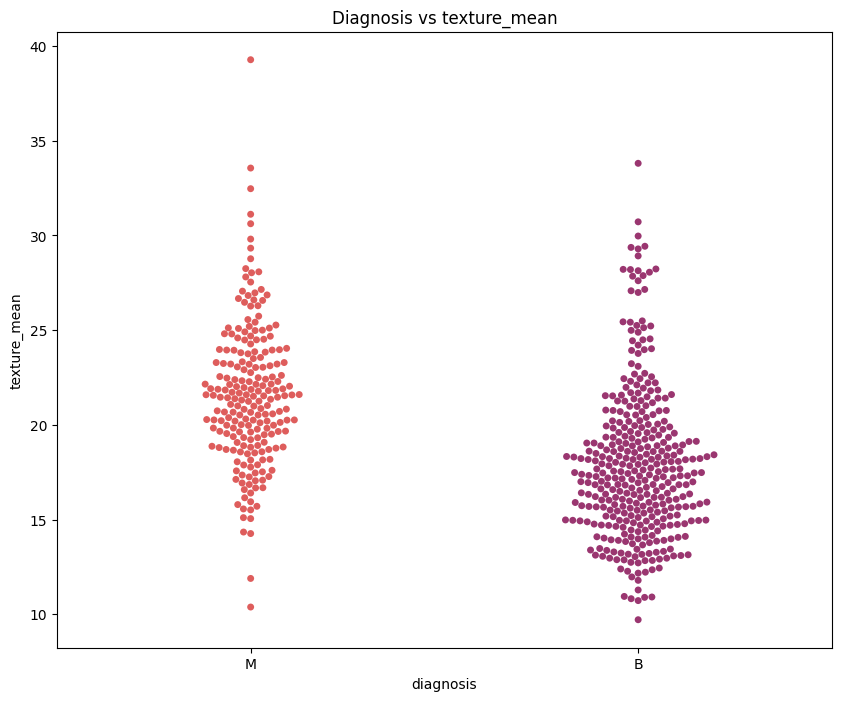

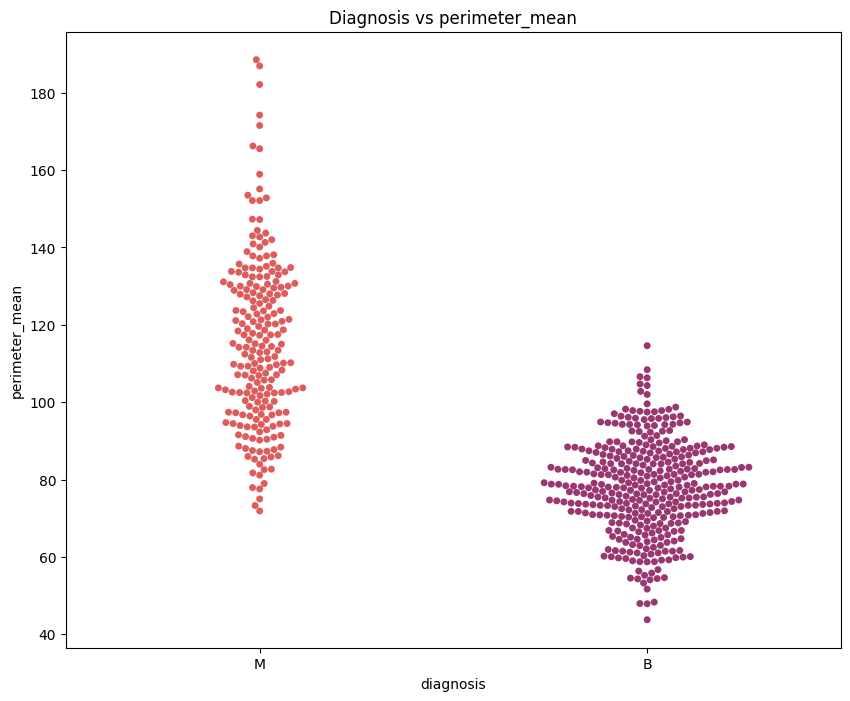

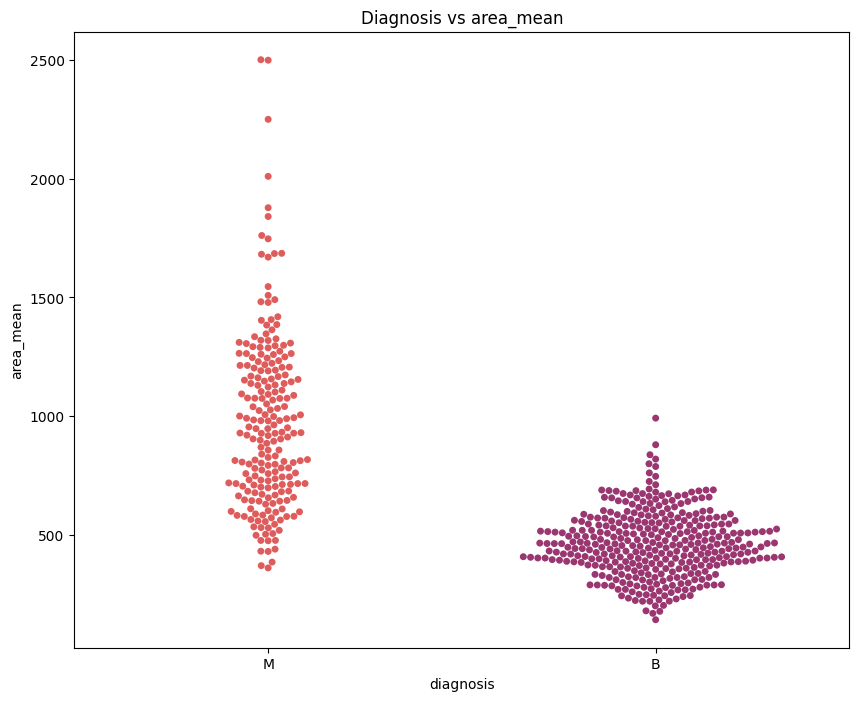

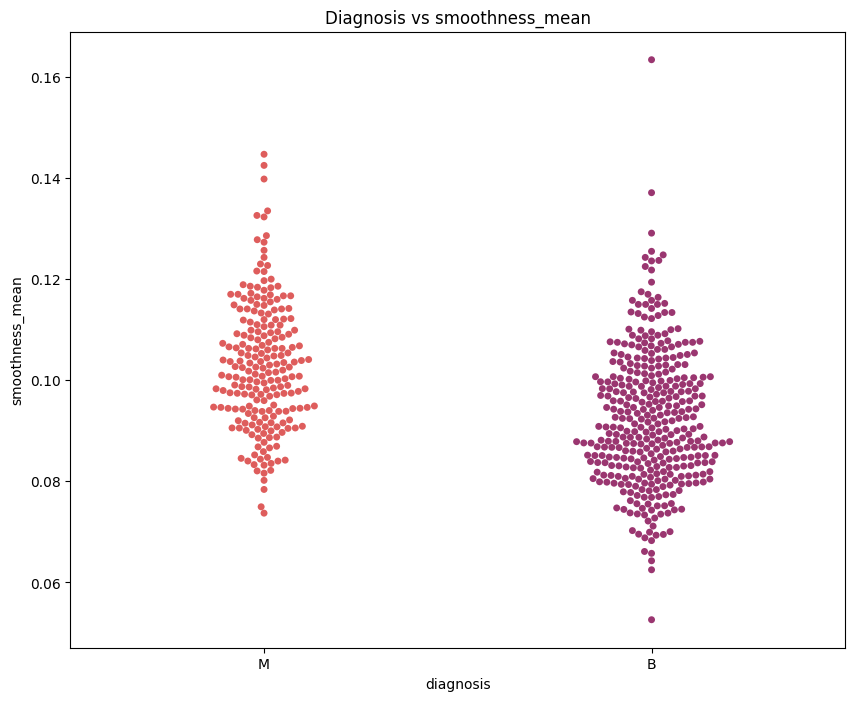

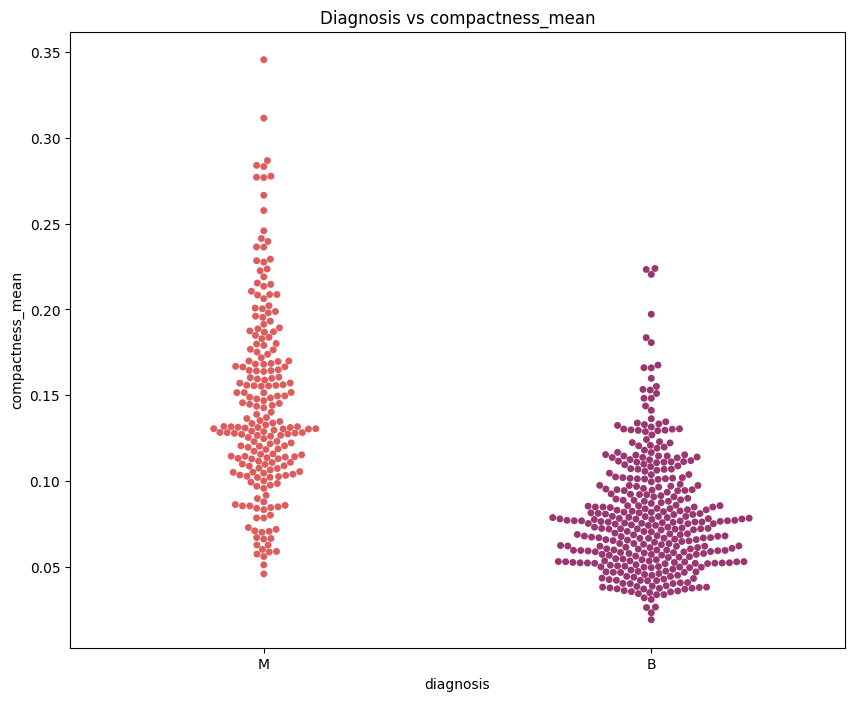

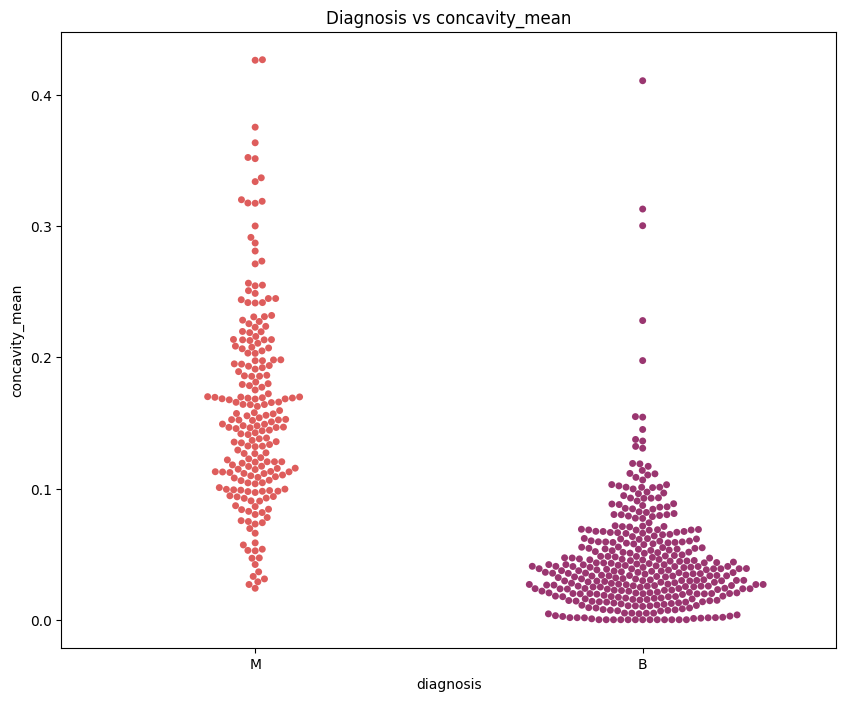

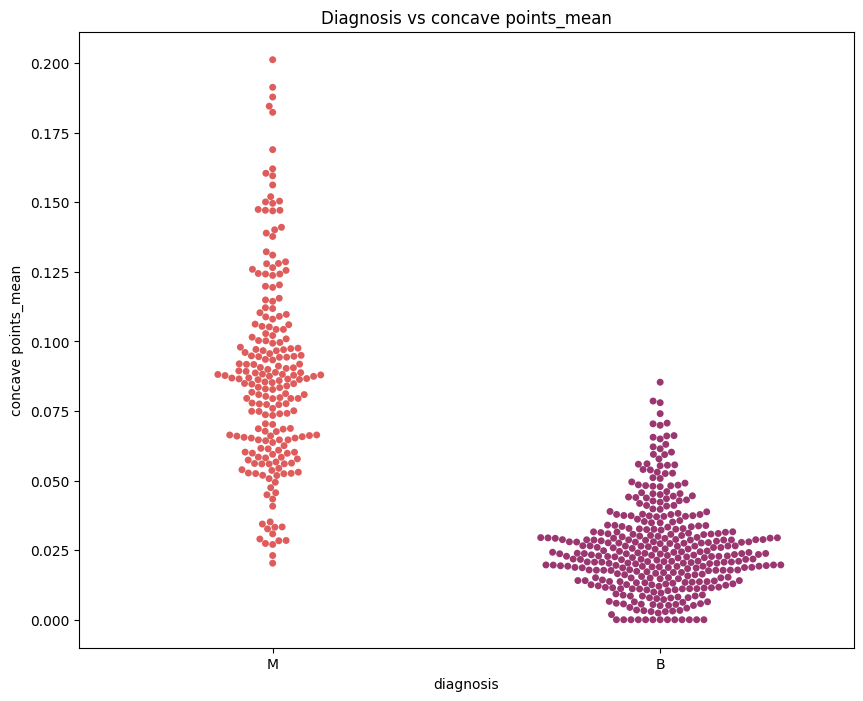

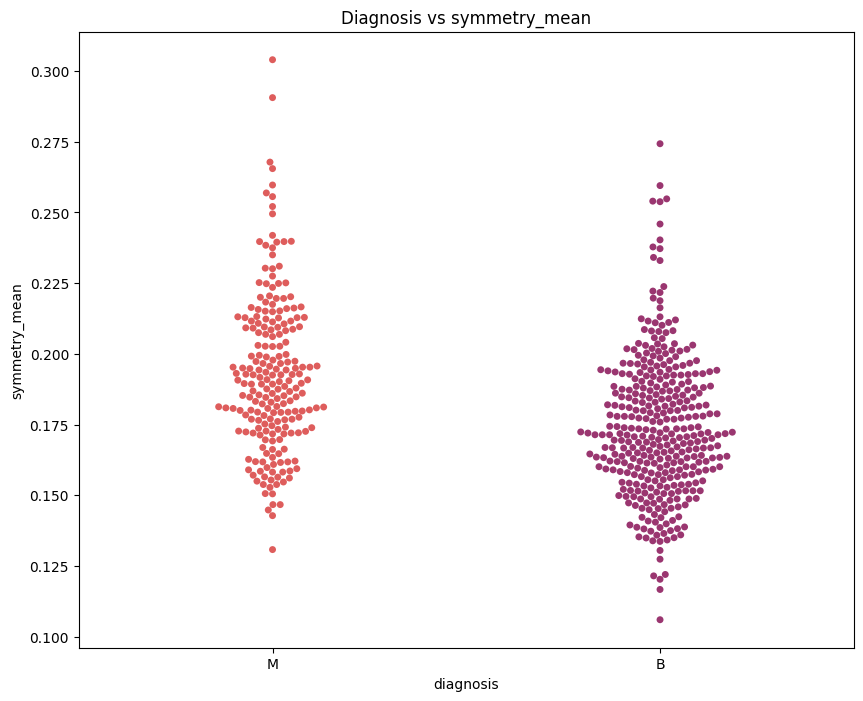

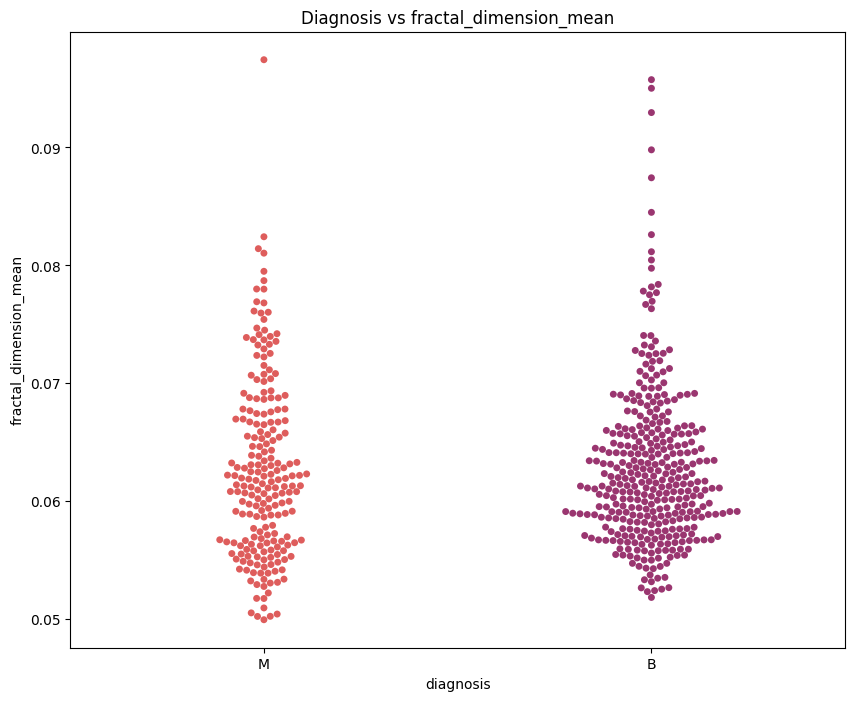

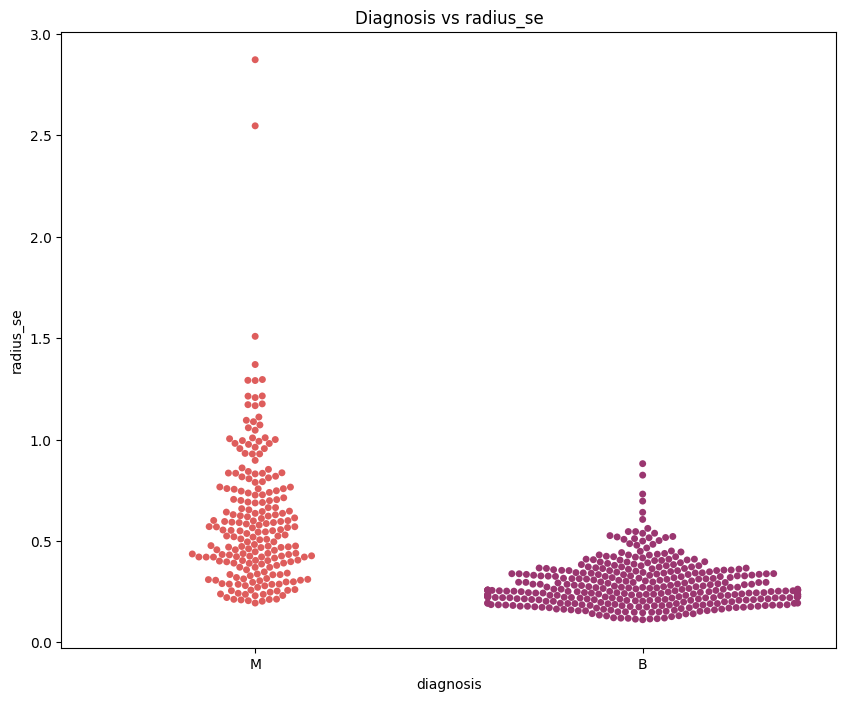

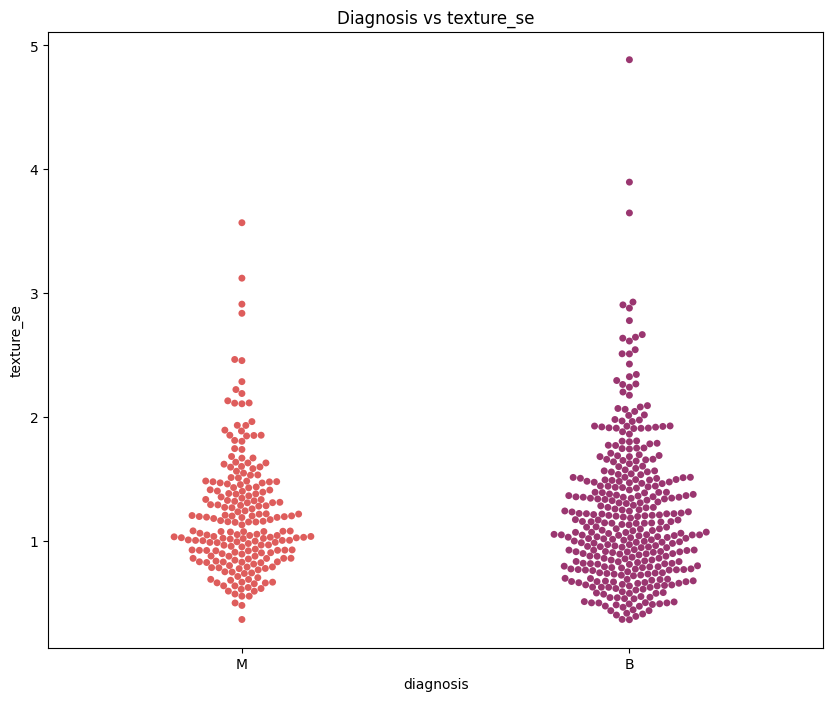

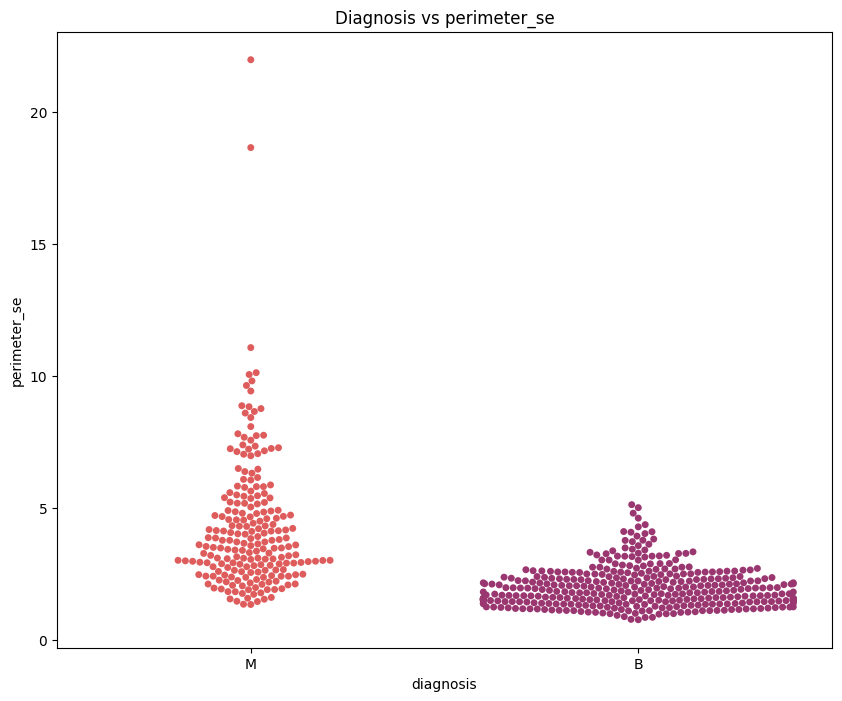

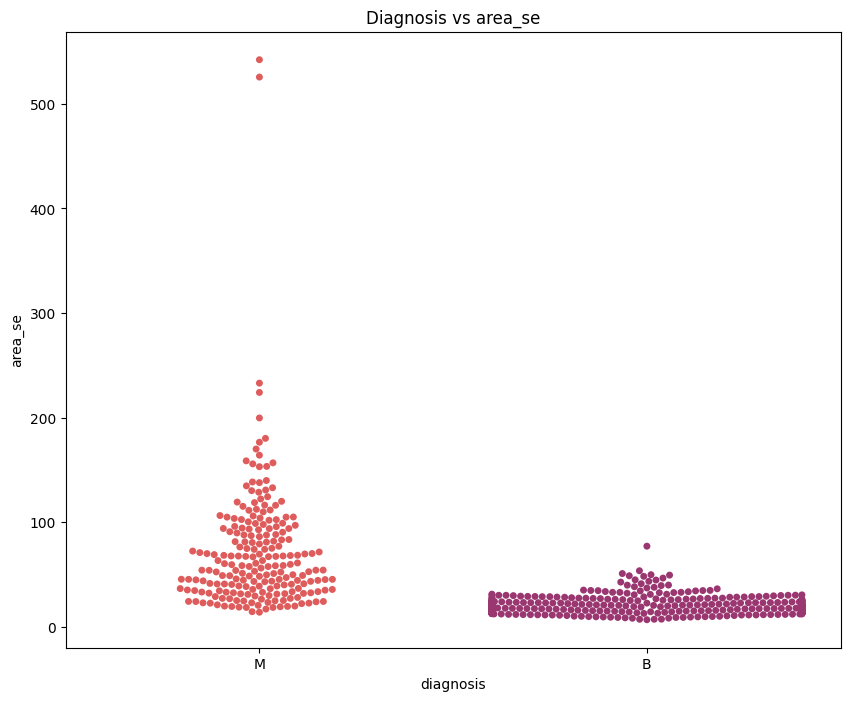

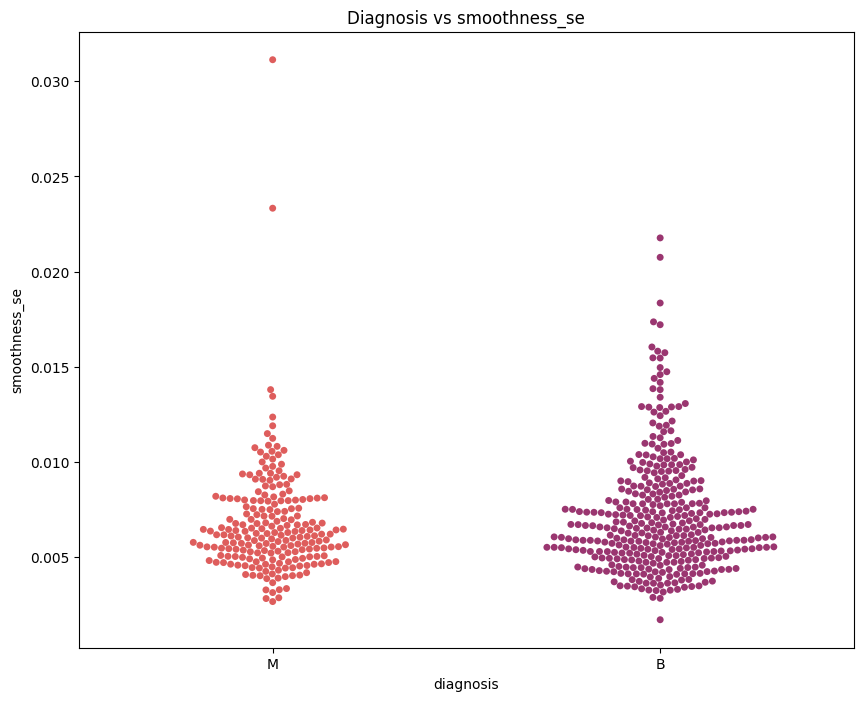

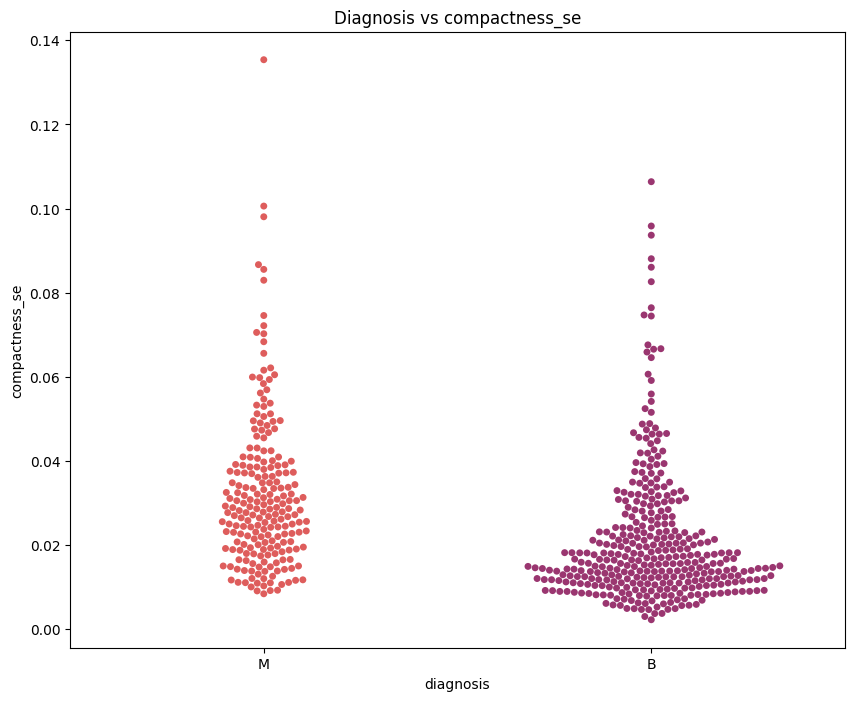

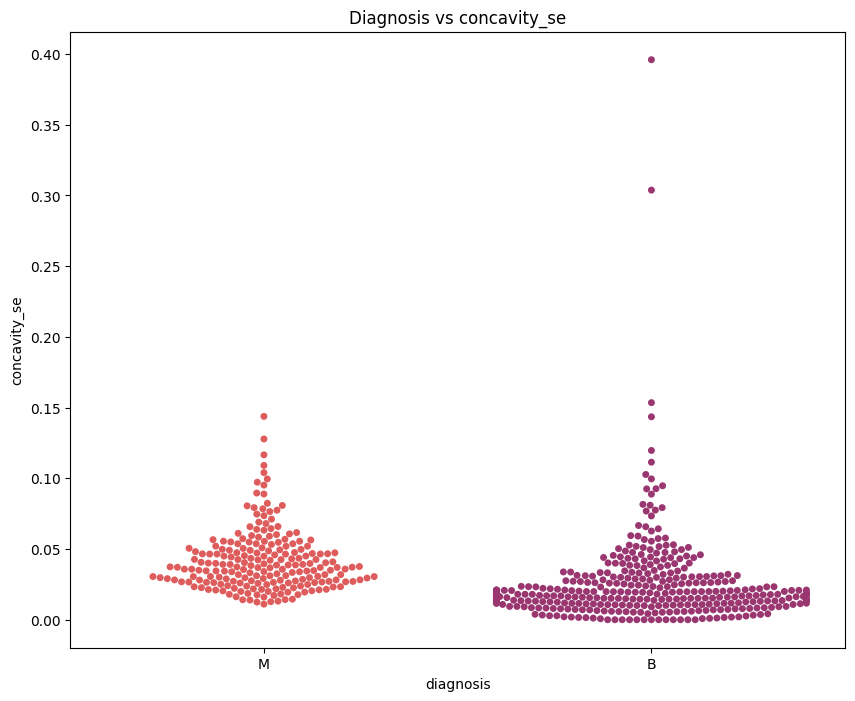

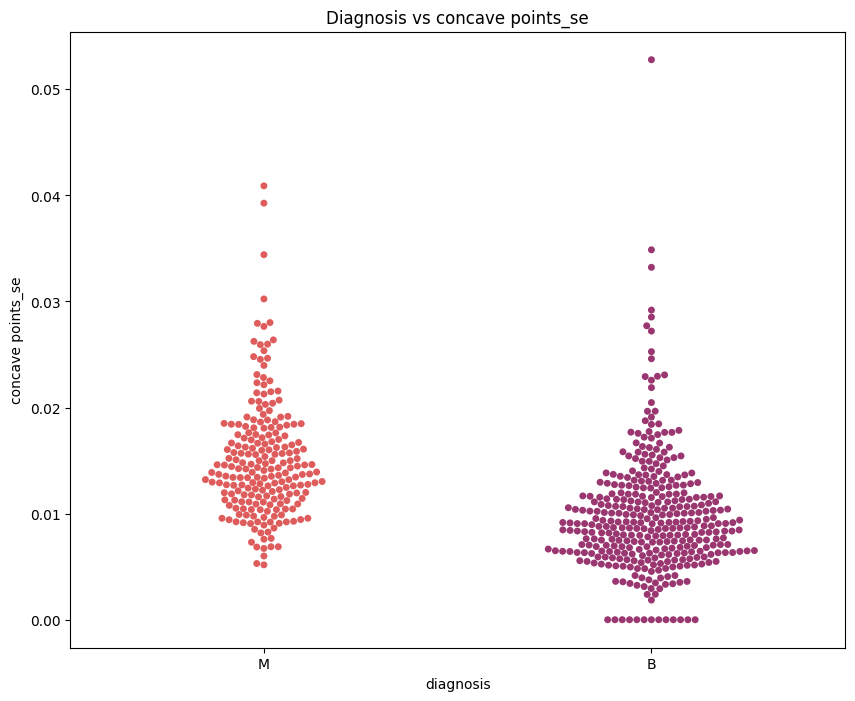

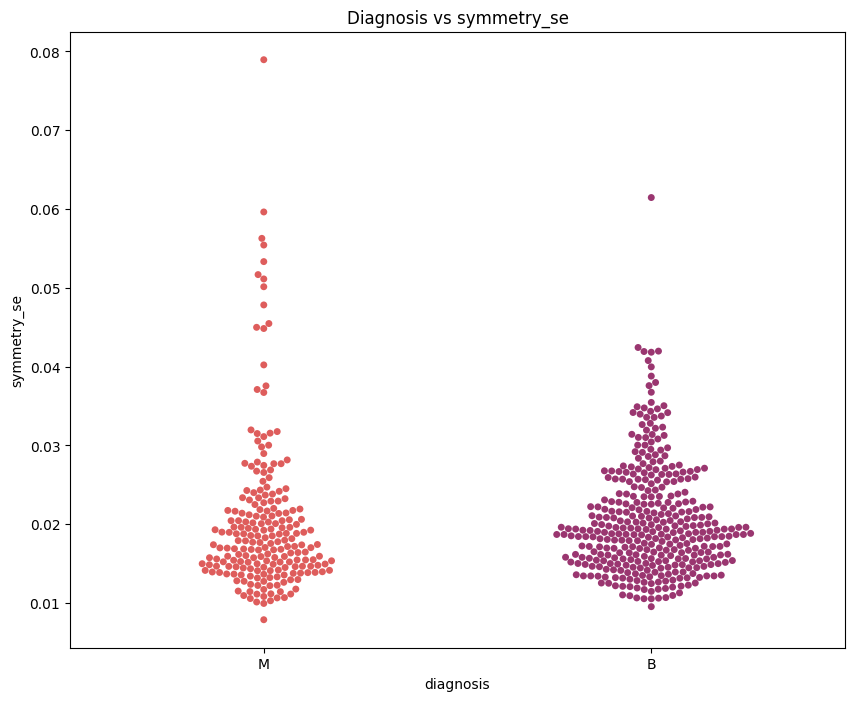

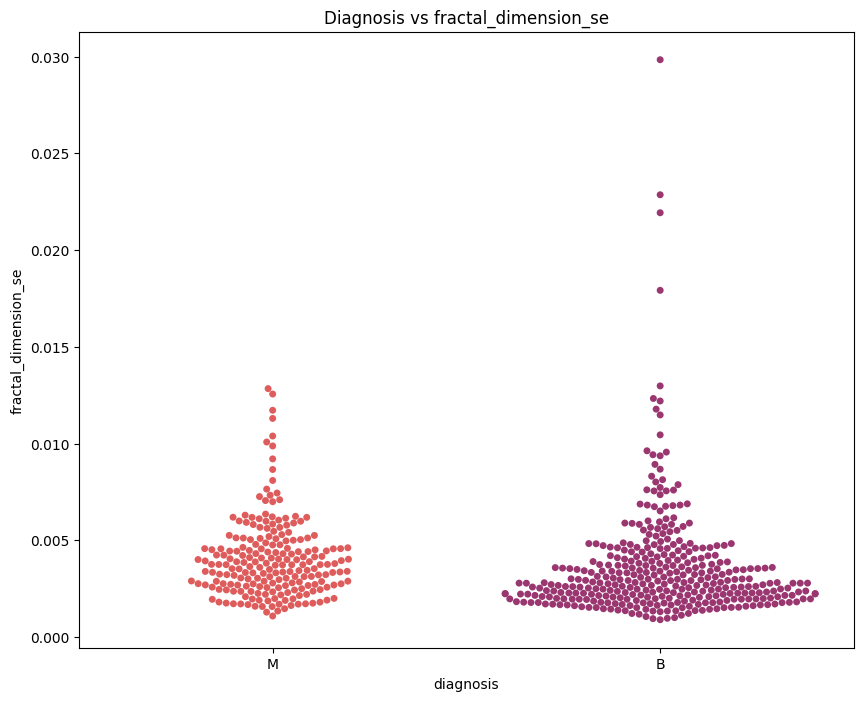

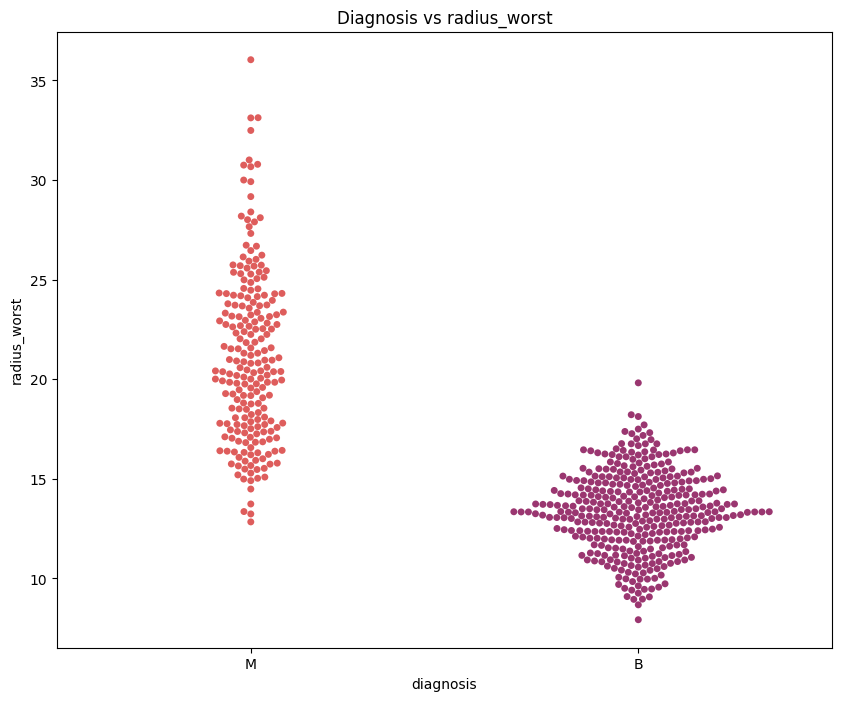

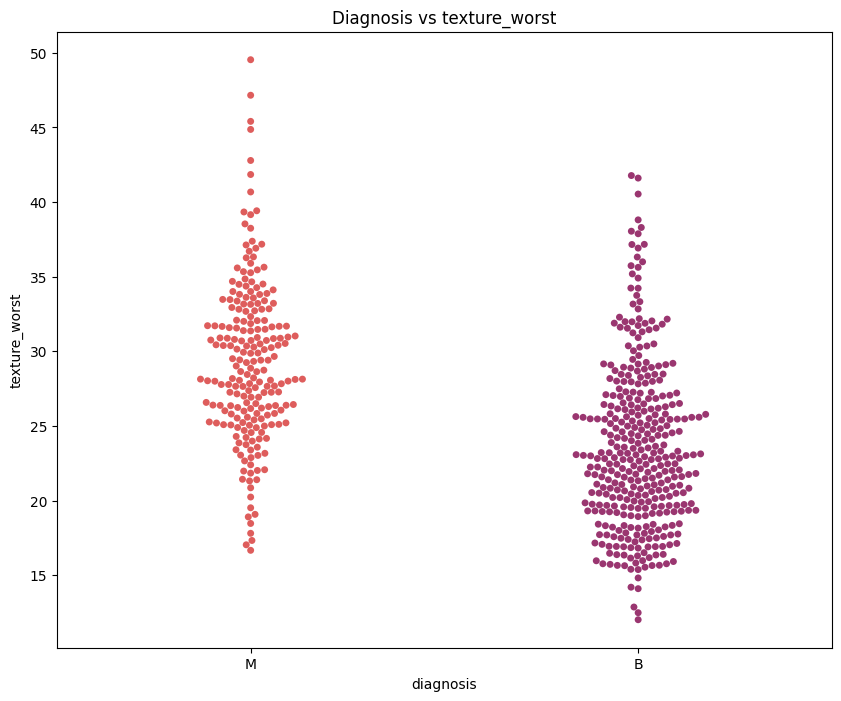

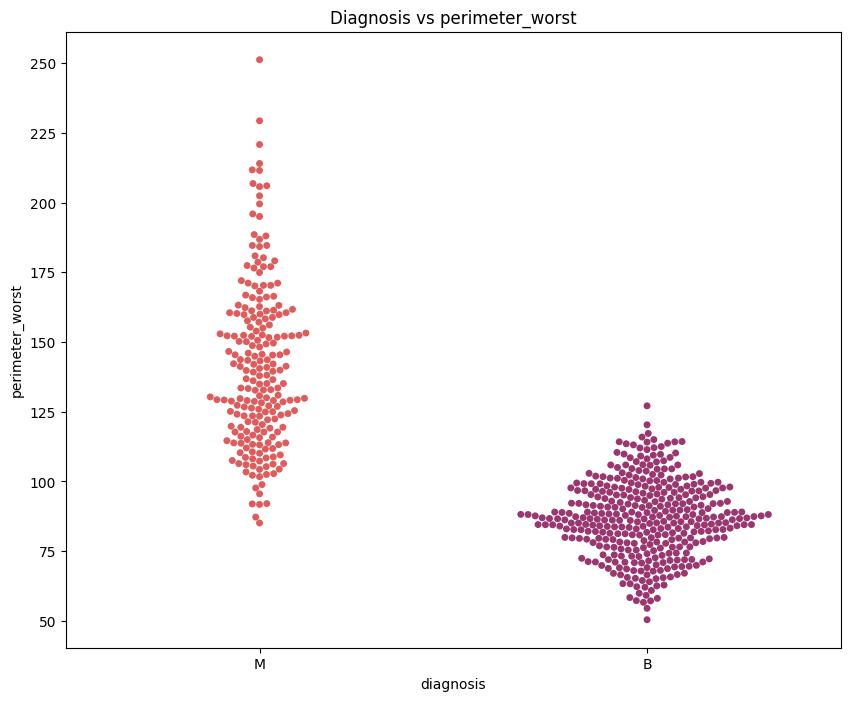

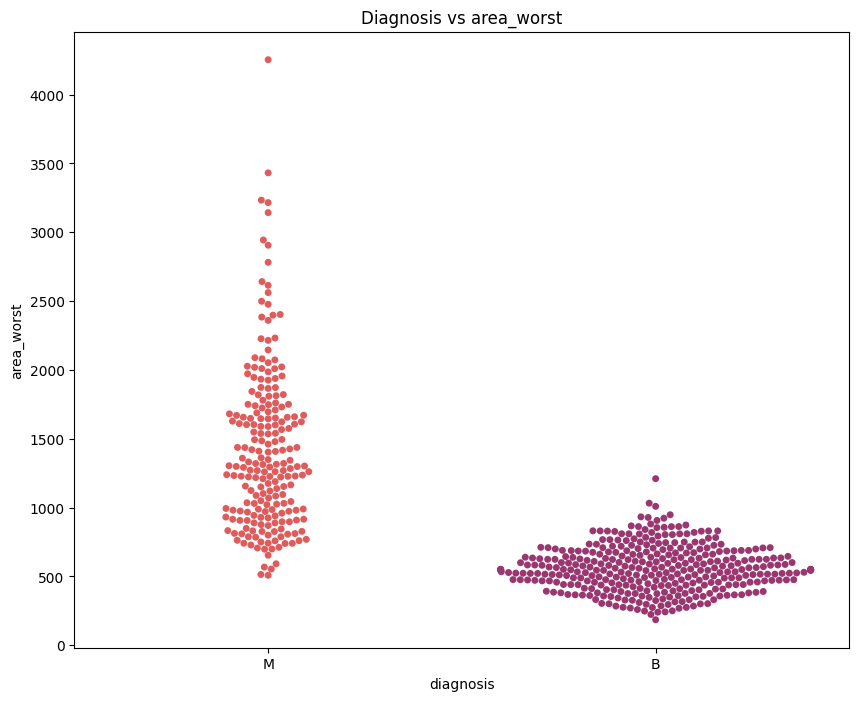

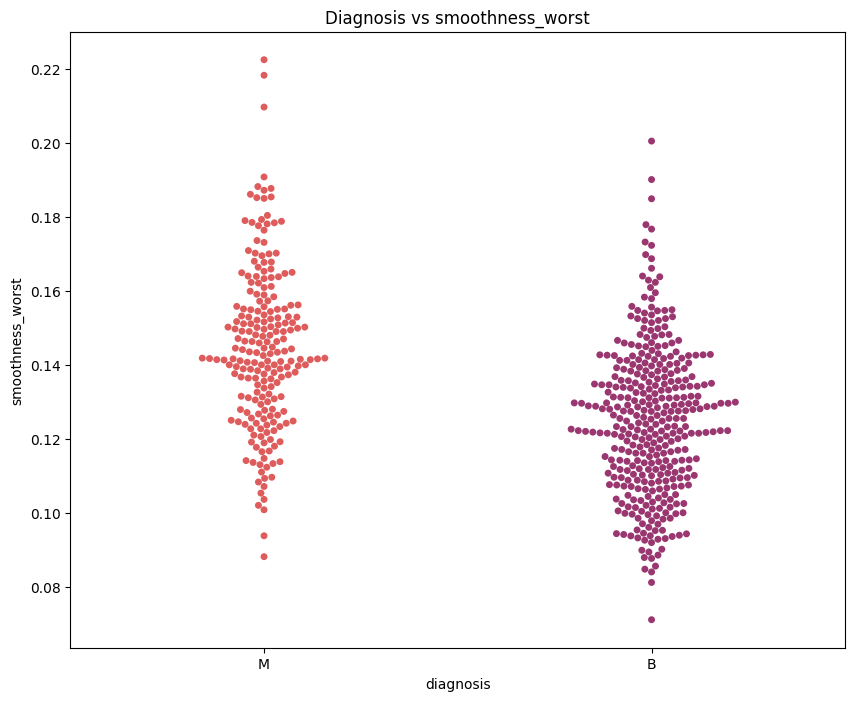

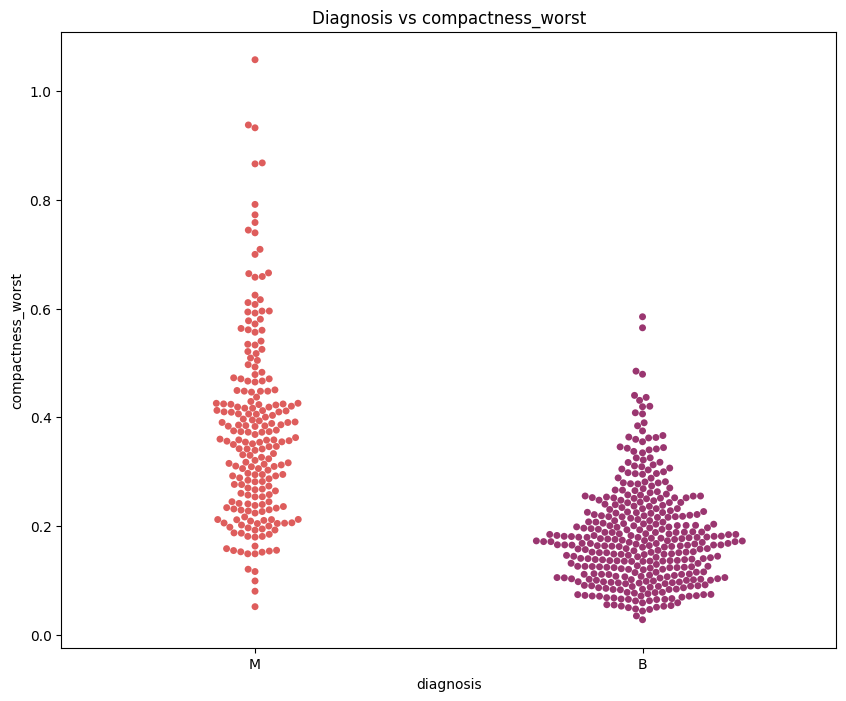

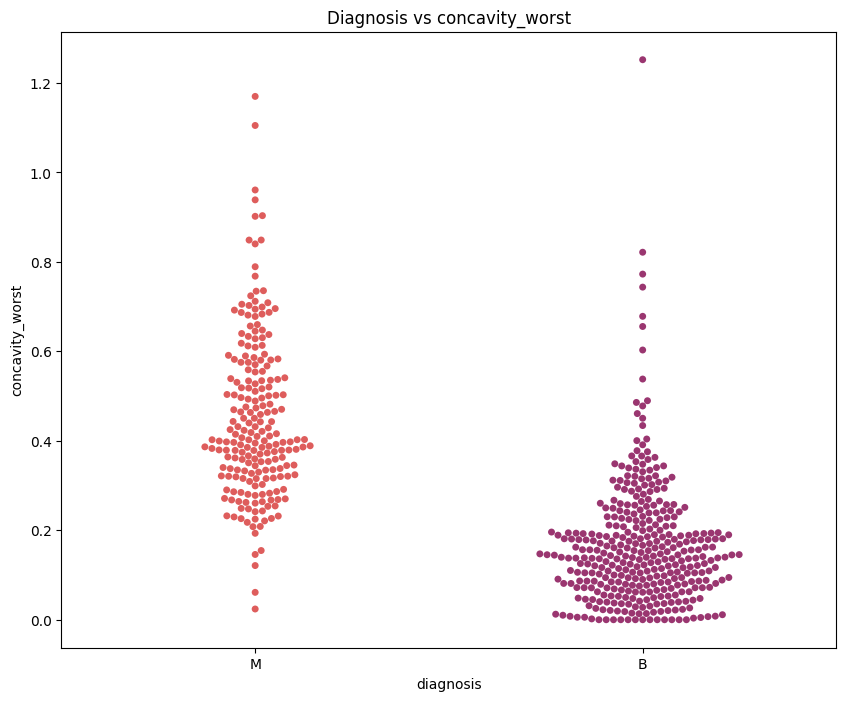

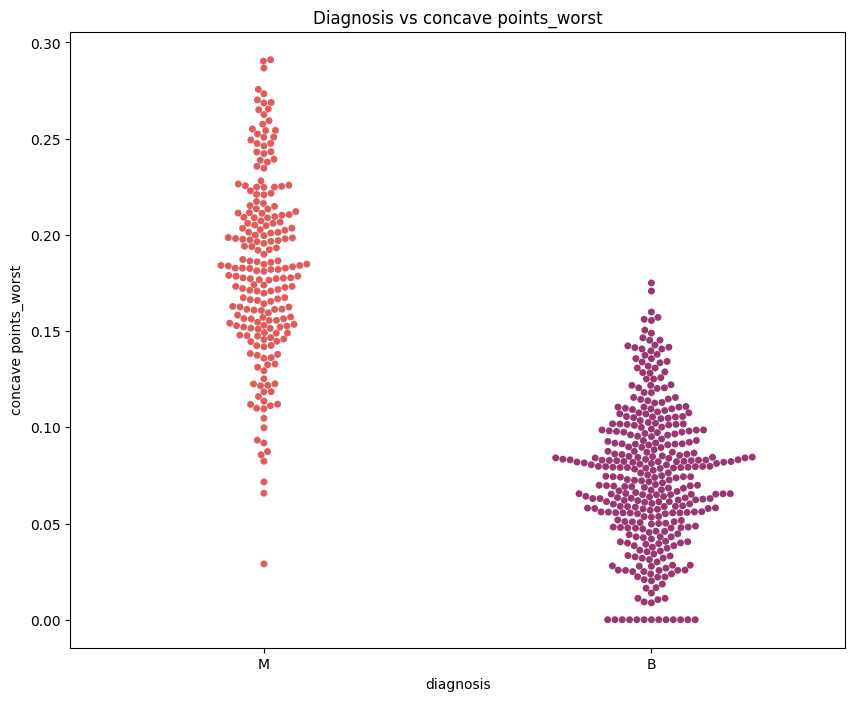

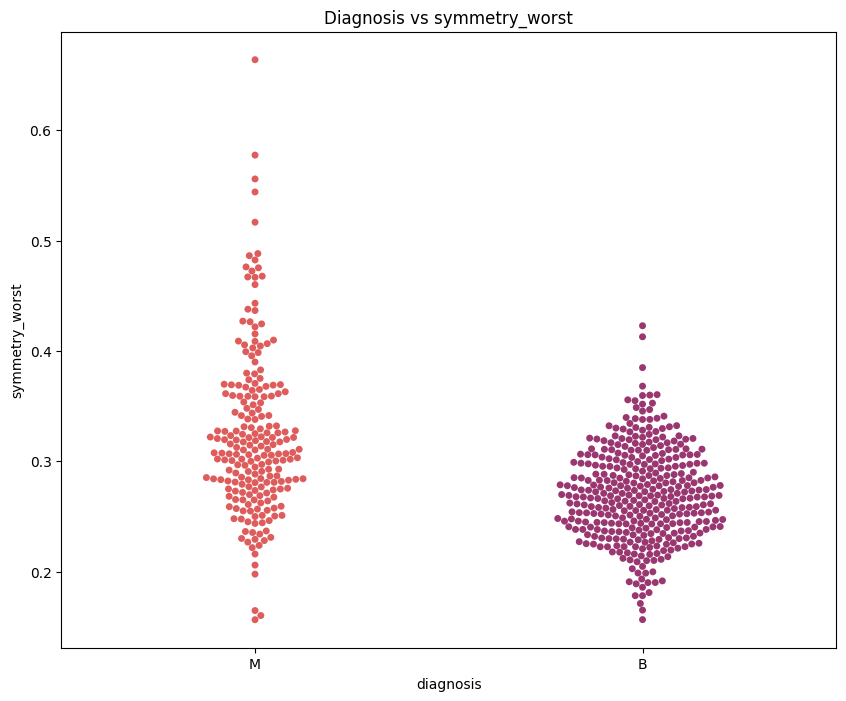

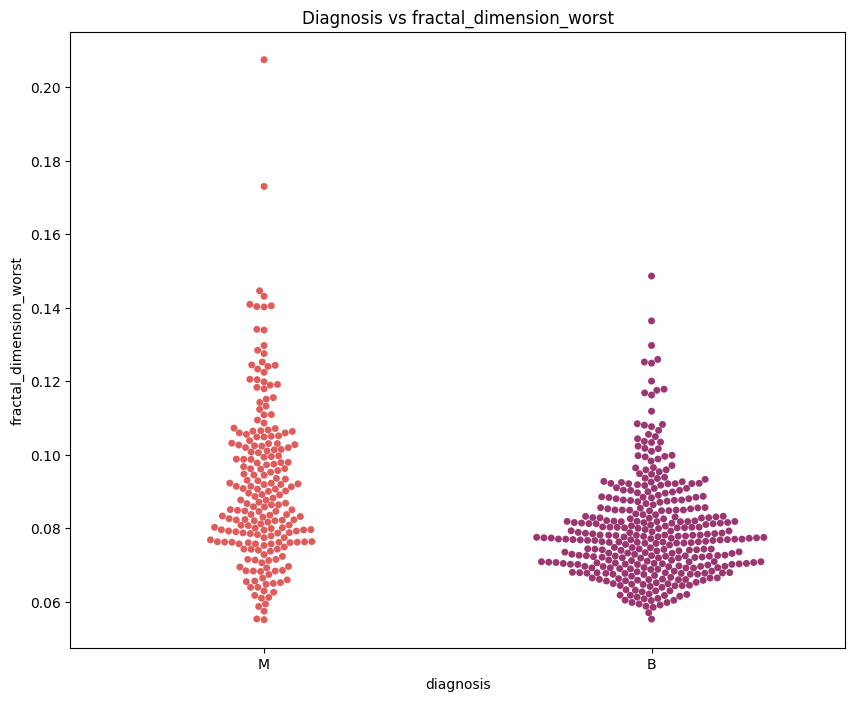

In [23]:
for i in numerical_columns:
    plt.figure(figsize=(10,8))
    sns.swarmplot(x=df['diagnosis'],y=df[i], palette = 'flare')
    plt.title(f"Diagnosis vs {i}")
    plt.show()

#Calculating Outliers per coloum

In [24]:
for i in numerical_columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_value = q1 - (1.5*IQR)
    higher_value = q3 + (1.5*IQR)
    count = df[df[i]  < lower_value].shape[0] + df[df[i] > higher_value].shape[0]
    if(count > 0):
        outliers_in_percentage = count/df[i].shape[0]
        print(f"% of outliers in {i} is {outliers_in_percentage*100}")



% of outliers in id is 14.235500878734623
% of outliers in radius_mean is 2.460456942003515
% of outliers in texture_mean is 1.2302284710017575
% of outliers in perimeter_mean is 2.2847100175746924
% of outliers in area_mean is 4.393673110720562
% of outliers in smoothness_mean is 1.054481546572935
% of outliers in compactness_mean is 2.8119507908611596
% of outliers in concavity_mean is 3.163444639718805
% of outliers in concave points_mean is 1.7574692442882252
% of outliers in symmetry_mean is 2.6362038664323375
% of outliers in fractal_dimension_mean is 2.6362038664323375
% of outliers in radius_se is 6.6783831282952555
% of outliers in texture_se is 3.5149384885764503
% of outliers in perimeter_se is 6.6783831282952555
% of outliers in area_se is 11.423550087873462
% of outliers in smoothness_se is 5.272407732864675
% of outliers in compactness_se is 4.92091388400703
% of outliers in concavity_se is 3.8664323374340945
% of outliers in concave points_se is 3.3391915641476277
% of o

 Outliers of all columns is less thab 0.5 %

Encoding Categorical data

In [25]:

le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1].values)
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     0
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     1
54     1
55     0
56     1
57     1
58     0
59     0
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     0
68     0
69     0
70     1
71     0
72     1
73     1
74     0
75     1
76     0
77     1
78     1
79     0
80     0
81     0
82     1
83     1
84     0
85     1
86     1
87     1
88     0
89     0
90     0
91     1
92     0
93     0
94     1
95     1
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    1
106    0
107    0
108    1
109    0
110    0
1

Dropping the coloum which has NaN values

In [26]:
X = df.drop(['id','diagnosis'],axis=1)
y= df['diagnosis']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

Training the models

In [28]:
training_models={
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting' : GradientBoostingClassifier()
}

In [29]:
for name,model in training_models.items():
    model.fit(X_train, y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
GaussianNB() has been trained
KNeighborsClassifier() has been trained
DecisionTreeClassifier() has been trained
RandomForestClassifier() has been trained
SVC() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained


Predicting the model

In [30]:
for name,model in training_models.items():
    print(name)
    print("Training Score:")
    y_pred = model.predict(X_train)
    print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
    print("\n")
    print('Test Score:')
    y_pred = model.predict(X_test)
    print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
    print("\n")
    print(f"Classification report of {name}: ")
    print(f"{classification_report(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))
    print("-"*100)

LogisticRegression
Training Score:
The accuracy score of Trained Data is 94.0


Test Score:
The accuracy score of Test Data is 96.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.97      0.94      0.96        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

[[101   2]
 [  4  64]]
----------------------------------------------------------------------------------------------------
GaussianNB
Training Score:
The accuracy score of Trained Data is 94.0


Test Score:
The accuracy score of Test Data is 96.0


Classification report of GaussianNB: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.98      0.91      0.95        68

    accuracy                           0.

# Apply Standardization and applying models

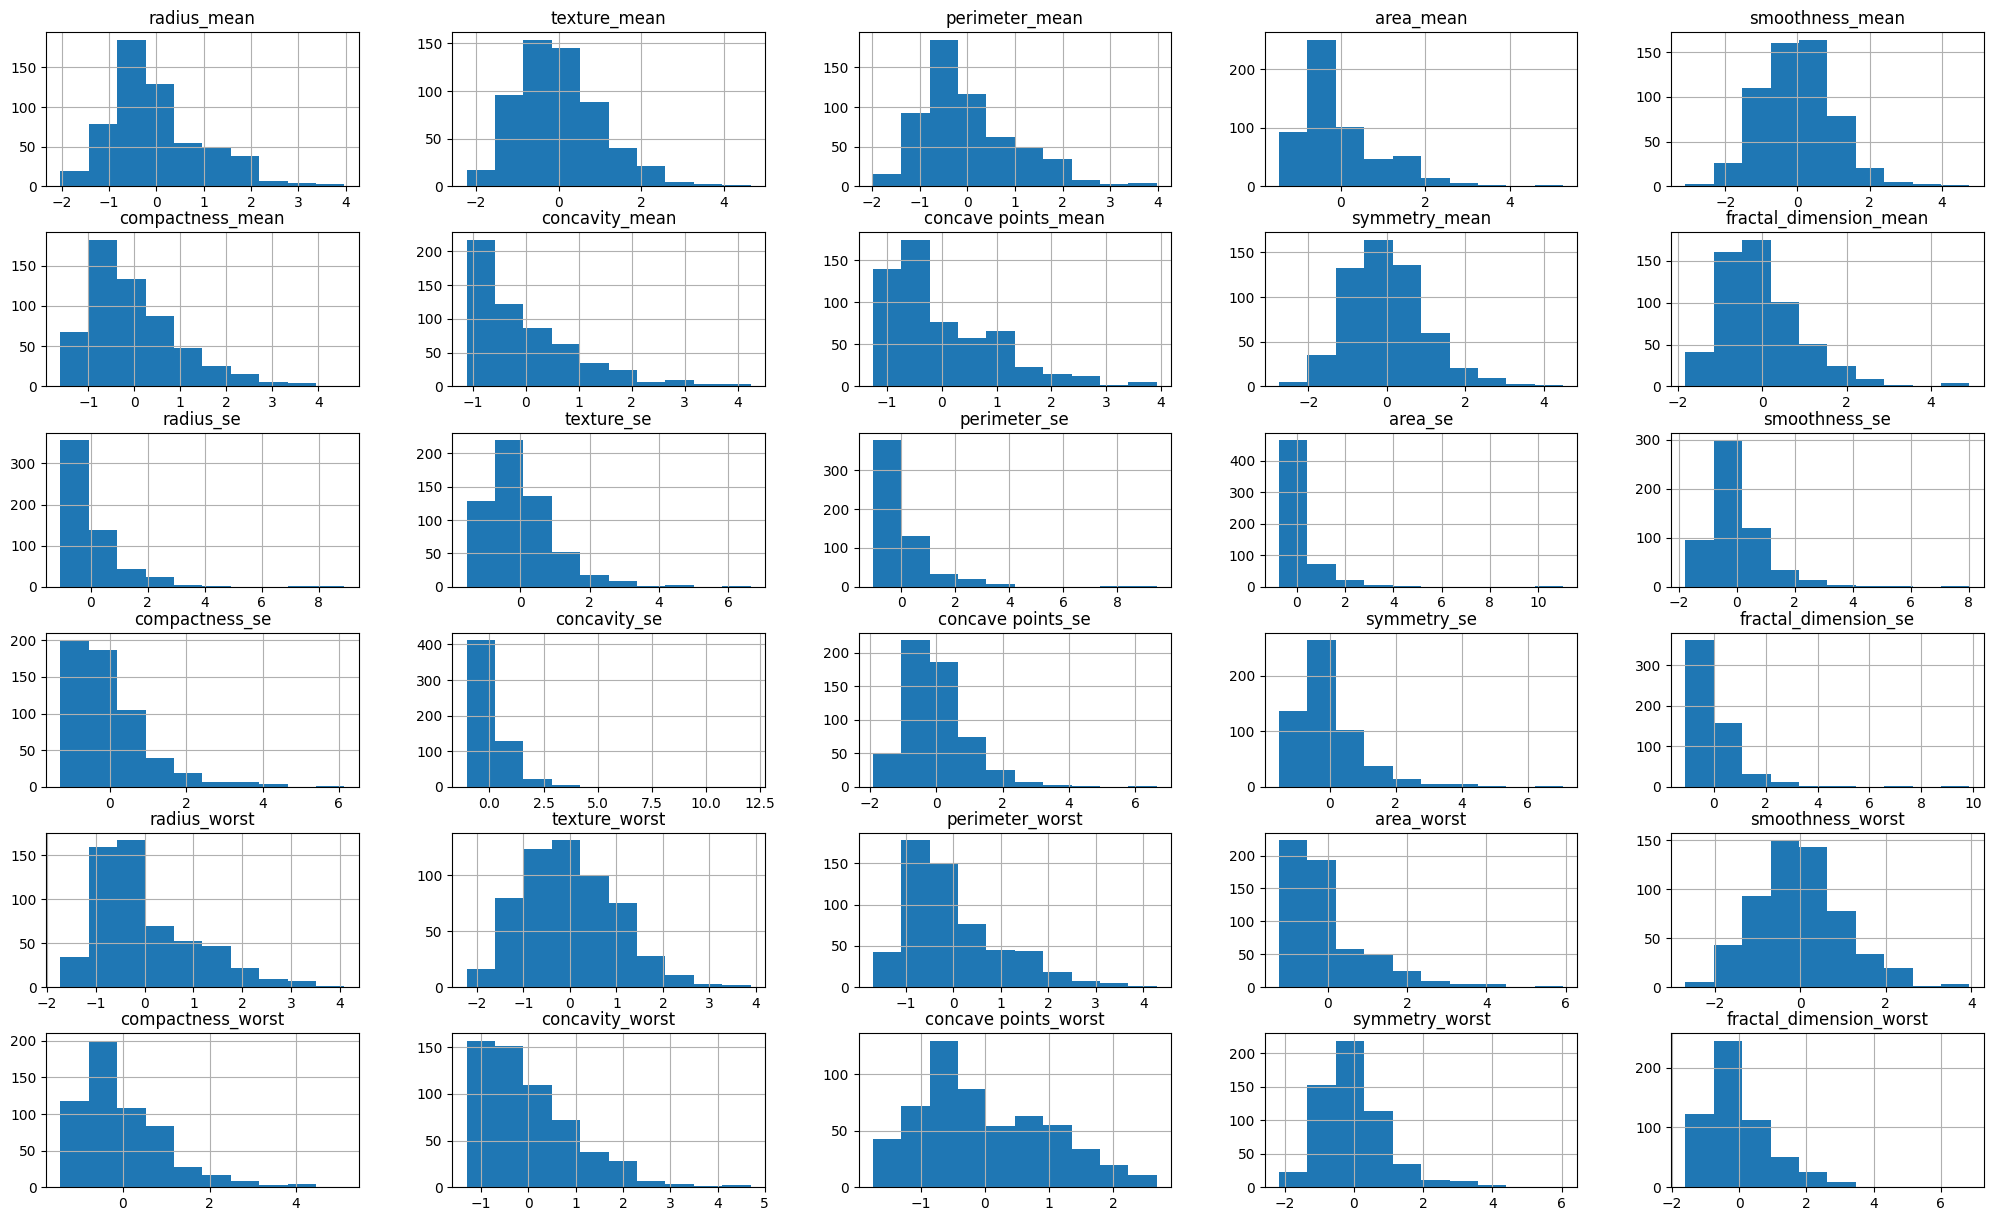

In [31]:
sc = StandardScaler()
X_scaled_columns = df.drop(['id','diagnosis'],axis=1).columns
X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X_scaled_columns)
X_scaled
X_scaled.hist(figsize=(25,15))
plt.show()

In [32]:
X_train,X_test,y_train,y_test =  train_test_split(X_scaled,y,test_size=0.3,random_state=123)

In [33]:
for name,model in training_models.items():
    model.fit(X_train, y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
GaussianNB() has been trained
KNeighborsClassifier() has been trained
DecisionTreeClassifier() has been trained
RandomForestClassifier() has been trained
SVC() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained


In [34]:
for name,model in training_models.items():
    print(name)
    print("Training Score:")
    y_pred = model.predict(X_train)
    print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
    print("\n")
    print('Test Score:')
    y_pred = model.predict(X_test)
    print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
    print("\n")
    print(f"Classification report of {name}: ")
    print(f"{classification_report(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))
    print("-"*100)

LogisticRegression
Training Score:
The accuracy score of Trained Data is 98.0


Test Score:
The accuracy score of Test Data is 99.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      0.99        68

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[103   0]
 [  1  67]]
----------------------------------------------------------------------------------------------------
GaussianNB
Training Score:
The accuracy score of Trained Data is 94.0


Test Score:
The accuracy score of Test Data is 96.0


Classification report of GaussianNB: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.98      0.91      0.95        68

    accuracy                           0.

# Performing Up and DownSampling

We are performing  Sampling as the data is perfectly balanced we have 62 % -  38 % of data in dependent variable. Now by performing up samping and downsampling, we will apply the machine learning models

In [35]:
data = df.copy()
df_majority = data[data['diagnosis'] ==0]
df_minority = data[data['diagnosis'] ==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = 212,random_state =42)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

df_minority_upsampled = resample(df_minority,replace= True,n_samples = 357,random_state =42)
df_upsampled = pd.concat([df_minority_upsampled,df_majority])

In [36]:
df_downsampled['diagnosis'].value_counts()

0    212
1    212
Name: diagnosis, dtype: int64

In [37]:
df_upsampled['diagnosis'].value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

# Apply models on Downsampled Data

In [38]:
X= df_downsampled.drop(['id','diagnosis'],axis=1)
y= df_downsampled['diagnosis']

In [39]:
print(X.shape)
print(y.shape)

(424, 30)
(424,)


In [40]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=123)

In [41]:
for name,model in training_models.items():
    model.fit(X_train, y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
GaussianNB() has been trained
KNeighborsClassifier() has been trained
DecisionTreeClassifier() has been trained
RandomForestClassifier() has been trained
SVC() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained


In [42]:
for name,model in training_models.items():
    print(name)
    print("Training Score:")
    y_pred = model.predict(X_train)
    print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
    print("\n")
    print('Test Score:')
    y_pred = model.predict(X_test)
    print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
    print("\n")
    print(f"Classification report of {name}: ")
    print(f"{classification_report(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))
    print("-"*100)

LogisticRegression
Training Score:
The accuracy score of Trained Data is 95.0


Test Score:
The accuracy score of Test Data is 92.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.92      0.92      0.92        64

    accuracy                           0.92       128
   macro avg       0.92      0.92      0.92       128
weighted avg       0.92      0.92      0.92       128

[[59  5]
 [ 5 59]]
----------------------------------------------------------------------------------------------------
GaussianNB
Training Score:
The accuracy score of Trained Data is 93.0


Test Score:
The accuracy score of Test Data is 95.0


Classification report of GaussianNB: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.97      0.92      0.94        64

    accuracy                           0.95  

# Applying models on Upsampled Data

In [43]:
X= df_upsampled.drop(['id','diagnosis'],axis=1)
y= df_upsampled['diagnosis']

In [44]:
print(X.shape)
print(y.shape)

(714, 30)
(714,)


In [45]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=123)

In [46]:
for name,model in training_models.items():
    model.fit(X_train, y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
GaussianNB() has been trained
KNeighborsClassifier() has been trained
DecisionTreeClassifier() has been trained
RandomForestClassifier() has been trained
SVC() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained


In [47]:
for name,model in training_models.items():
    print(name)
    print("Training Score:")
    y_pred = model.predict(X_train)
    print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
    print("\n")
    print('Test Score:')
    y_pred = model.predict(X_test)
    print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
    print("\n")
    print(f"Classification report of {name}: ")
    print(f"{classification_report(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))
    print("-"*100)

LogisticRegression
Training Score:
The accuracy score of Trained Data is 96.0


Test Score:
The accuracy score of Test Data is 94.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.96      0.93      0.94       117

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215

[[ 93   5]
 [  8 109]]
----------------------------------------------------------------------------------------------------
GaussianNB
Training Score:
The accuracy score of Trained Data is 92.0


Test Score:
The accuracy score of Test Data is 92.0


Classification report of GaussianNB: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        98
           1       0.97      0.88      0.92       117

    accuracy                           0.

# Applying Classification models on Downsampling Data with Standardization

In [48]:
Downsampled_X = df_downsampled.drop(['id','diagnosis'],axis=1)
Downsampled_y = df_downsampled['diagnosis']
X = pd.DataFrame(sc.fit_transform(Downsampled_X),columns = X_scaled_columns)
y = Downsampled_y

In [49]:
print(X.shape)
print(y.shape)

(424, 30)
(424,)


In [50]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=123)

In [51]:
for name,model in training_models.items():
    model.fit(X_train, y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
GaussianNB() has been trained
KNeighborsClassifier() has been trained
DecisionTreeClassifier() has been trained
RandomForestClassifier() has been trained
SVC() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained


In [52]:
for name,model in training_models.items():
    print(name)
    print("Training Score:")
    y_pred = model.predict(X_train)
    print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
    print("\n")
    print('Test Score:')
    y_pred = model.predict(X_test)
    print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
    print("\n")
    print(f"Classification report of {name}: ")
    print(f"{classification_report(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))
    print("-"*100)

LogisticRegression
Training Score:
The accuracy score of Trained Data is 99.0


Test Score:
The accuracy score of Test Data is 95.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.95      0.94      0.94        64

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128

[[61  3]
 [ 4 60]]
----------------------------------------------------------------------------------------------------
GaussianNB
Training Score:
The accuracy score of Trained Data is 94.0


Test Score:
The accuracy score of Test Data is 95.0


Classification report of GaussianNB: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.97      0.92      0.94        64

    accuracy                           0.95  

# Applying Classification models on Upsampling Data with Standardization

In [53]:
upsampled_X = df_upsampled.drop(['id','diagnosis'],axis=1)
upsampled_y = df_upsampled['diagnosis']
X = pd.DataFrame(sc.fit_transform(upsampled_X),columns = X_scaled_columns)
y = upsampled_y

In [54]:
print(X.shape)
print(y.shape)

(714, 30)
(714,)


In [55]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=123)

In [56]:
for name,model in training_models.items():
    model.fit(X_train, y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
GaussianNB() has been trained
KNeighborsClassifier() has been trained
DecisionTreeClassifier() has been trained
RandomForestClassifier() has been trained
SVC() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained


In [57]:

for name,model in training_models.items():
    print(name)
    print("Training Score:")
    y_pred = model.predict(X_train)
    print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
    print("\n")
    print('Test Score:')
    y_pred = model.predict(X_test)
    print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
    print("\n")
    print(f"Classification report of {name}: ")
    print(f"{classification_report(y_test,y_pred)}")
    print(confusion_matrix(y_test,y_pred))
    print("-"*100)

LogisticRegression
Training Score:
The accuracy score of Trained Data is 98.0


Test Score:
The accuracy score of Test Data is 98.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.98       117

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

[[ 96   2]
 [  3 114]]
----------------------------------------------------------------------------------------------------
GaussianNB
Training Score:
The accuracy score of Trained Data is 91.0


Test Score:
The accuracy score of Test Data is 92.0


Classification report of GaussianNB: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        98
           1       0.97      0.88      0.92       117

    accuracy                           0.

# Hyperparameter Tuning using GridSearchCV

In [58]:


Logistic_Regression_Param = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                              'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
                              'C' : [100, 10, 1.0, 0.1, 0.01]}

SVCParam = {'C': [0.1, 1, 10, 100, 1000]}

DecisionTreeParam = {"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}
RandomForestParam = {'max_depth': [1, 2, 3, 4],
                    'n_estimators': [100, 150, 200, 250, 300]}
AdaBoostParam = {'n_estimators'  : [1,2,5,10,40,50],
                  'learning_rate' : [0.2,0.5,1,2,5]}

GradientBoostParam = {
                       'n_estimators'  : [1,2,5,10,20,30,40,50],
                       'max_depth'  : [1,2,5,10,20,30]}

KNeighborsParam = {'weights' : ['uniform', 'distance',None],
                    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'n_neighbors' : list(range(2,20))
                    }




In [66]:
LogisticRegressioncv = GridSearchCV(estimator=training_models['LogisticRegression'],cv=5,scoring = 'accuracy',param_grid=Logistic_Regression_Param)
LogisticRegressioncv.fit(X_train,y_train)

print(LogisticRegressioncv.best_params_)
print(LogisticRegressioncv.best_estimator_)

# #from sklearn.linear_model import LinearRegression
Classifier = LogisticRegression(C =100, penalty = 'none', solver = 'lbfgs')
Classifier.fit(X_train,y_train)
print("LogisticRegression")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of LogisticRegression: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
LogisticRegression(C=100, penalty='none')
LogisticRegression
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 97.0


Classification report of LogisticRegression: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        98
           1       0.97      0.97      0.97       117

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[ 95   3]
 [  4 113]]


In [60]:
SVCcv = GridSearchCV(estimator=training_models['SVC'],cv=5,scoring = 'accuracy',param_grid=SVCParam)
SVCcv.fit(X_train,y_train)

print(SVCcv.best_params_)
print(SVCcv.best_estimator_)

Classifier = SVC(C =100)
Classifier.fit(X_train,y_train)
print("SVC")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of SVC: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'C': 100}
SVC(C=100)
SVC
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 98.0


Classification report of SVC: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.97      0.98      0.98       117

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

[[ 95   3]
 [  2 115]]


In [61]:
DecisionTreecv = GridSearchCV(estimator=training_models['DecisionTreeClassifier'],cv=5,scoring = 'accuracy',param_grid=DecisionTreeParam)
DecisionTreecv.fit(X_train,y_train)

print(DecisionTreecv.best_params_)
print(DecisionTreecv.best_estimator_)

Classifier = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1)
Classifier.fit(X_train,y_train)
print("DecisionTree")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of DecisionTree: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'max_depth': 9, 'min_samples_leaf': 1}
DecisionTreeClassifier(max_depth=9)
DecisionTree
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 97.0


Classification report of DecisionTree: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.96      0.97       117

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[ 96   2]
 [  5 112]]


In [62]:
RandomForestcv = GridSearchCV(estimator=training_models['RandomForestClassifier'],cv=5,scoring = 'accuracy',param_grid=RandomForestParam)
RandomForestcv.fit(X_train,y_train)

print(RandomForestcv.best_params_)
print(RandomForestcv.best_estimator_)

Classifier = RandomForestClassifier(max_depth = 4, n_estimators = 200)
Classifier.fit(X_train,y_train)
print("RandomForest")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of RandomForest: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'max_depth': 4, 'n_estimators': 150}
RandomForestClassifier(max_depth=4, n_estimators=150)
RandomForest
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 97.0


Classification report of RandomForest: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.98      0.97      0.97       117

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[ 96   2]
 [  4 113]]


In [63]:
AdaBoostcv = GridSearchCV(estimator=training_models['AdaBoost'],cv=5,scoring = 'accuracy',param_grid=AdaBoostParam)
AdaBoostcv .fit(X_train,y_train)

print(AdaBoostcv.best_params_)
print(AdaBoostcv.best_estimator_)

Classifier = AdaBoostClassifier(learning_rate = 1, n_estimators = 50)
Classifier.fit(X_train,y_train)
print("AdaBoost")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of AdaBoost: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'learning_rate': 1, 'n_estimators': 50}
AdaBoostClassifier(learning_rate=1)
AdaBoost
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 97.0


Classification report of AdaBoost: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.99      0.95      0.97       117

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[ 97   1]
 [  6 111]]


In [64]:
GradientBoostcv = GridSearchCV(estimator=training_models['GradientBoosting'],cv=5,scoring = 'accuracy',param_grid=GradientBoostParam)
GradientBoostcv.fit(X_train,y_train)

print(GradientBoostcv.best_params_)
print(GradientBoostcv.best_estimator_)


Classifier = GradientBoostingClassifier(max_depth = 2, n_estimators = 50)
Classifier.fit(X_train,y_train)
print("GradientBoosting")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of GradientBoosting: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'max_depth': 2, 'n_estimators': 50}
GradientBoostingClassifier(max_depth=2, n_estimators=50)
GradientBoosting
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 97.0


Classification report of GradientBoosting: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        98
           1       0.98      0.97      0.97       117

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215

[[ 96   2]
 [  4 113]]


In [65]:
KNeighborscv = GridSearchCV(estimator=training_models['KNeighborsClassifier'],cv=5,scoring = 'accuracy',param_grid=KNeighborsParam)
KNeighborscv.fit(X_train,y_train)

print(KNeighborscv.best_params_)
print(KNeighborscv.best_estimator_)


Classifier = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 8, weights = 'distance')
Classifier.fit(X_train,y_train)
print("KNeighborsClassifier")
print("Training Score:")
y_pred = Classifier.predict(X_train)
print(f"The accuracy score of Trained Data is {round(accuracy_score(y_train,y_pred),2)*100}")
print("\n")
print('Test Score:')
y_pred = Classifier.predict(X_test)
print(f"The accuracy score of Test Data is {round(accuracy_score(y_test,y_pred),2)*100}")
print("\n")
print(f"Classification report of KNeighborsClassifier: ")
print(f"{classification_report(y_test,y_pred)}")
print(confusion_matrix(y_test,y_pred))

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=8, weights='distance')
KNeighborsClassifier
Training Score:
The accuracy score of Trained Data is 100.0


Test Score:
The accuracy score of Test Data is 98.0


Classification report of KNeighborsClassifier: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.98      0.98      0.98       117

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

[[ 96   2]
 [  2 115]]
